# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning II</font>

# Redes Neurais Recorrentes LSTM - Long Short-Term Memory 

## Prevendo Séries Temporais com LSTMs

In [1]:
import tensorflow as tf
tf.__version__

C:\Users\Guto\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


'2.5.0'

In [2]:
import keras as k
k.__version__

'2.5.0'

In [3]:
# Imports
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Imports para formatação dos gráficos
#plt.style.use('fivethirtyeight')
import matplotlib as m

m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [4]:
# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [5]:
# Random seed 
numpy.random.seed(7)

In [6]:
# Carrega o dataset
#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

In [16]:
# Carrega os dataframe
dataframe = pandas.read_csv("./CSV/pipaColBrokerDia.csv")
dataframe['DATA'] = pandas.to_datetime(dataframe.DATA, format = '%Y-%m-%dT%H:%M:%S.%fZ')
dataframe.rename(columns={'DATA': 'Data'}, inplace=True)
dataframe = dataframe[['Data','BROKER','SERVICE_NAME','SERVICE_CLASS','PROGRAMA', 'QUANTIDADE']]
dataframe.rename(columns={'BROKER': 'Broker', 'SERVICE_NAME': 'Service_name', 'SERVICE_CLASS': 'Service_class',
                      'PROGRAMA': 'Programa', 'QUANTIDADE': 'Quantidade'}, inplace=True)

# Carregando os dados
# Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
# pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
# carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
# com informações que podemos excluir com o argumento skipfooter para pandas.read_csv() 
# Uma vez carregado, podemos plotar facilmente todo o conjunto de dados. 

filtro1 = dataframe['Broker']=='ETB170'
filtro2 = dataframe['Service_name']=='PORTALDETRAN'
filtro3 = dataframe['Programa']=='NSDGX500'
dataframe = dataframe[filtro1 & filtro2 & filtro3]

dataframe = dataframe.rename_axis('index').reset_index()
dataframe.drop(columns=['index','Broker','Service_name','Service_class','Programa'], inplace=True)

# Remove as linhas com as datas duplicadas
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
# inclui dados missing com a interpolação 

dataframe.drop_duplicates(subset='Data', inplace=True)
dataframe = dataframe.set_index('Data')
dataframe = dataframe.resample('D').interpolate()


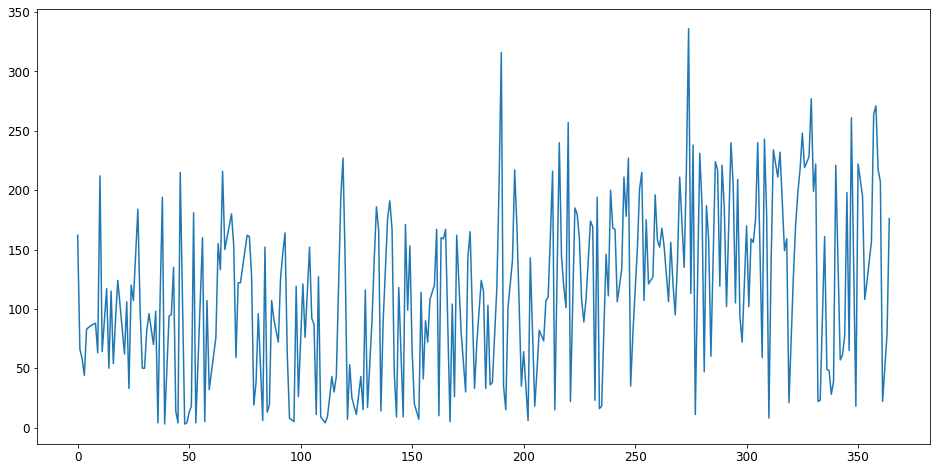

In [17]:
dataset=dataframe.copy()
dataset = dataset.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

Epoch 1/400
290/290 - 3s - loss: 0.0552
Epoch 2/400
290/290 - 1s - loss: 0.0350
Epoch 3/400
290/290 - 1s - loss: 0.0351
Epoch 4/400
290/290 - 1s - loss: 0.0350
Epoch 5/400
290/290 - 1s - loss: 0.0349
Epoch 6/400
290/290 - 1s - loss: 0.0350
Epoch 7/400
290/290 - 1s - loss: 0.0349
Epoch 8/400
290/290 - 1s - loss: 0.0348
Epoch 9/400
290/290 - 1s - loss: 0.0348
Epoch 10/400
290/290 - 1s - loss: 0.0347
Epoch 11/400
290/290 - 1s - loss: 0.0350
Epoch 12/400
290/290 - 1s - loss: 0.0345
Epoch 13/400
290/290 - 1s - loss: 0.0345
Epoch 14/400
290/290 - 1s - loss: 0.0346
Epoch 15/400
290/290 - 1s - loss: 0.0349
Epoch 16/400
290/290 - 1s - loss: 0.0349
Epoch 17/400
290/290 - 1s - loss: 0.0347
Epoch 18/400
290/290 - 1s - loss: 0.0347
Epoch 19/400
290/290 - 1s - loss: 0.0347
Epoch 20/400
290/290 - 1s - loss: 0.0349
Epoch 21/400
290/290 - 1s - loss: 0.0346
Epoch 22/400
290/290 - 1s - loss: 0.0348
Epoch 23/400
290/290 - 1s - loss: 0.0347
Epoch 24/400
290/290 - 1s - loss: 0.0347
Epoch 25/400
290/290 - 1s

Epoch 199/400
290/290 - 1s - loss: 0.0341
Epoch 200/400
290/290 - 1s - loss: 0.0341
Epoch 201/400
290/290 - 1s - loss: 0.0341
Epoch 202/400
290/290 - 1s - loss: 0.0343
Epoch 203/400
290/290 - 1s - loss: 0.0339
Epoch 204/400
290/290 - 1s - loss: 0.0344
Epoch 205/400
290/290 - 1s - loss: 0.0341
Epoch 206/400
290/290 - 1s - loss: 0.0337
Epoch 207/400
290/290 - 1s - loss: 0.0344
Epoch 208/400
290/290 - 1s - loss: 0.0339
Epoch 209/400
290/290 - 1s - loss: 0.0343
Epoch 210/400
290/290 - 1s - loss: 0.0340
Epoch 211/400
290/290 - 1s - loss: 0.0342
Epoch 212/400
290/290 - 1s - loss: 0.0343
Epoch 213/400
290/290 - 1s - loss: 0.0342
Epoch 214/400
290/290 - 1s - loss: 0.0341
Epoch 215/400
290/290 - 1s - loss: 0.0341
Epoch 216/400
290/290 - 1s - loss: 0.0342
Epoch 217/400
290/290 - 1s - loss: 0.0342
Epoch 218/400
290/290 - 1s - loss: 0.0342
Epoch 219/400
290/290 - 1s - loss: 0.0342
Epoch 220/400
290/290 - 1s - loss: 0.0342
Epoch 221/400
290/290 - 1s - loss: 0.0341
Epoch 222/400
290/290 - 1s - loss:

290/290 - 1s - loss: 0.0339
Epoch 395/400
290/290 - 1s - loss: 0.0343
Epoch 396/400
290/290 - 1s - loss: 0.0340
Epoch 397/400
290/290 - 1s - loss: 0.0341
Epoch 398/400
290/290 - 1s - loss: 0.0340
Epoch 399/400
290/290 - 1s - loss: 0.0339
Epoch 400/400
290/290 - 1s - loss: 0.0341
Score em Treino: 61.10 RMSE
Score em Teste: 80.99 RMSE


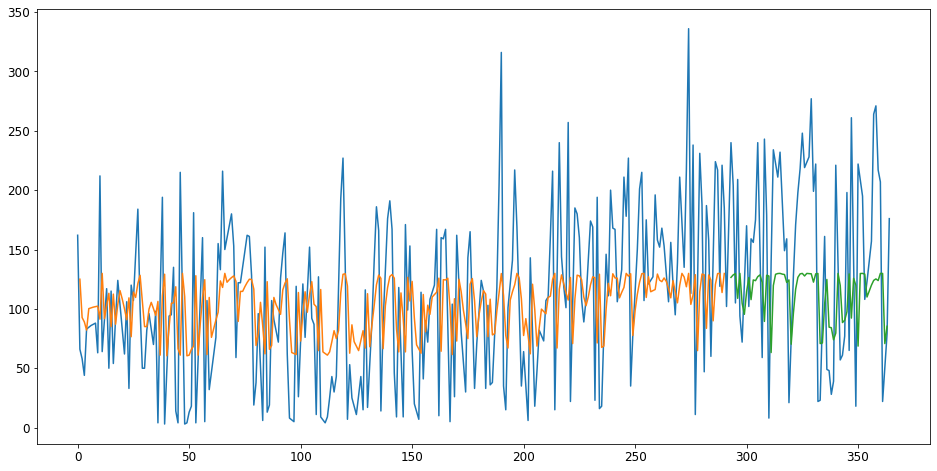

In [16]:
# Normaliza os dados
# As LSTMs são sensíveis à escala dos dados de entrada, especificamente quando funções de ativação sigmoide (padrão)
# ou tanh são usadas. Pode ser uma boa prática redimensionar os dados para o range de 0 a 1, 
# também chamado de normalização. Podemos normalizar facilmente o conjunto de dados usando a classe MinMaxScaler do scikit-learn
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# A rede LSTM espera que os dados de entrada (X) sejam fornecidos com uma estrutura de matriz específica 
# na forma de: [amostras, etapas de tempo, características]. Nossos dados preparados estão na forma: [amostras,
# features] e estamos enquadrando o problema como um único passo para cada amostra. Podemos transformar
# os dados de treino e de teste na estrutura esperada usando numpy.reshape() 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Cria o modelo LSTM
# Agora estamos prontos para projetar nossa rede LSTM para esse problema. A rede tem uma
# camada visível com 1 entrada, uma camada oculta com 4 blocos LSTM ou neurônios e uma camada de saída
# que faz uma previsão de valor único. A função de ativação sigmoid padrão é usada para
# os blocos de memória LSTM. A rede é treinada em 200 épocas e um tamanho de lote (batch_size) de 1 é usado.
model = Sequential()
model.add(LSTM(8, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 400, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [17]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 61.10 RMSE
Score em Teste: 80.99 RMSE


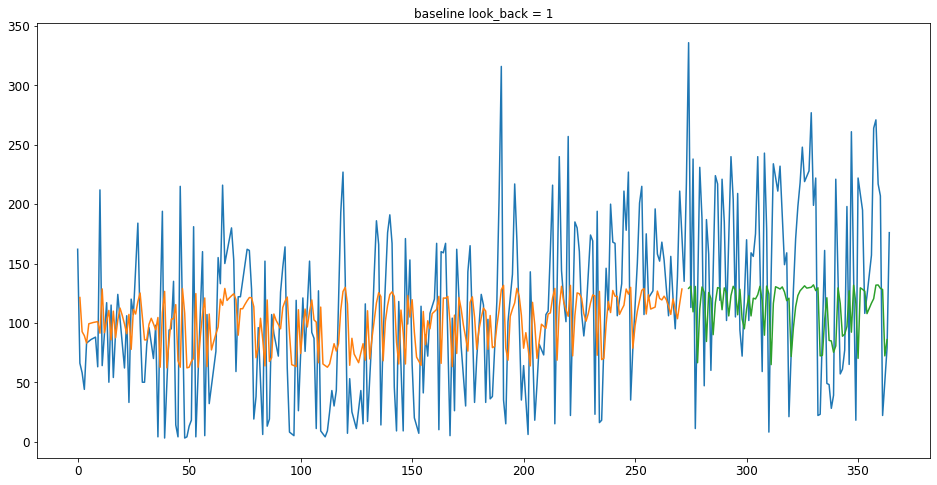

In [13]:
# Plot do baseline e previsões
plt.title('baseline look_back = 1')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

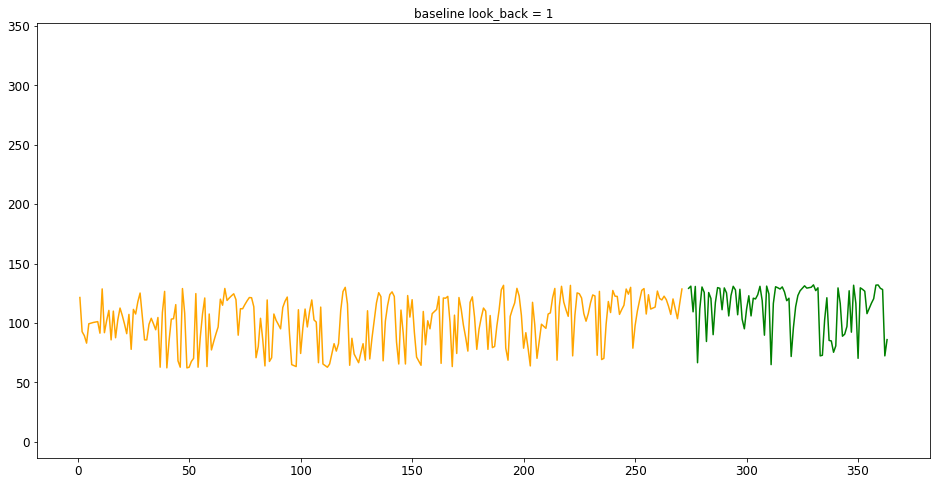

In [14]:
# Plot do baseline e previsões
plt.title('baseline look_back = 1')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

## Prevendo Séries Temporais com LSTMs e Método Window

Podemos também explicar o problema de modo que várias etapas de tempo anteriores possam ser usadas para previsão do próximo passo. Isso é chamado de janela (window) e o tamanho da janela é um parâmetro que pode ser configurado para cada problema.

In [9]:
# Carrega o dataset
#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

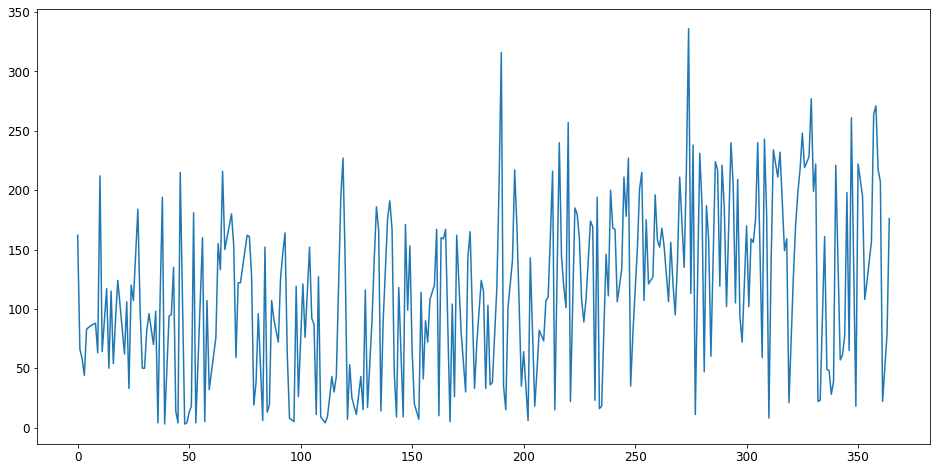

In [47]:
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

Epoch 1/400
261/261 - 3s - loss: 0.0452
Epoch 2/400
261/261 - 1s - loss: 0.0383
Epoch 3/400
261/261 - 1s - loss: 0.0367
Epoch 4/400
261/261 - 1s - loss: 0.0359
Epoch 5/400
261/261 - 1s - loss: 0.0348
Epoch 6/400
261/261 - 1s - loss: 0.0343
Epoch 7/400
261/261 - 1s - loss: 0.0338
Epoch 8/400
261/261 - 1s - loss: 0.0341
Epoch 9/400
261/261 - 1s - loss: 0.0330
Epoch 10/400
261/261 - 1s - loss: 0.0328
Epoch 11/400
261/261 - 1s - loss: 0.0332
Epoch 12/400
261/261 - 1s - loss: 0.0326
Epoch 13/400
261/261 - 1s - loss: 0.0322
Epoch 14/400
261/261 - 1s - loss: 0.0323
Epoch 15/400
261/261 - 1s - loss: 0.0321
Epoch 16/400
261/261 - 1s - loss: 0.0324
Epoch 17/400
261/261 - 1s - loss: 0.0319
Epoch 18/400
261/261 - 1s - loss: 0.0315
Epoch 19/400
261/261 - 1s - loss: 0.0312
Epoch 20/400
261/261 - 1s - loss: 0.0312
Epoch 21/400
261/261 - 1s - loss: 0.0314
Epoch 22/400
261/261 - 1s - loss: 0.0307
Epoch 23/400
261/261 - 1s - loss: 0.0312
Epoch 24/400
261/261 - 1s - loss: 0.0307
Epoch 25/400
261/261 - 1s

Epoch 199/400
261/261 - 1s - loss: 0.0046
Epoch 200/400
261/261 - 1s - loss: 0.0045
Epoch 201/400
261/261 - 1s - loss: 0.0047
Epoch 202/400
261/261 - 1s - loss: 0.0042
Epoch 203/400
261/261 - 1s - loss: 0.0046
Epoch 204/400
261/261 - 1s - loss: 0.0042
Epoch 205/400
261/261 - 1s - loss: 0.0041
Epoch 206/400
261/261 - 1s - loss: 0.0039
Epoch 207/400
261/261 - 1s - loss: 0.0041
Epoch 208/400
261/261 - 1s - loss: 0.0043
Epoch 209/400
261/261 - 1s - loss: 0.0041
Epoch 210/400
261/261 - 1s - loss: 0.0038
Epoch 211/400
261/261 - 1s - loss: 0.0037
Epoch 212/400
261/261 - 1s - loss: 0.0039
Epoch 213/400
261/261 - 1s - loss: 0.0037
Epoch 214/400
261/261 - 1s - loss: 0.0038
Epoch 215/400
261/261 - 1s - loss: 0.0039
Epoch 216/400
261/261 - 1s - loss: 0.0039
Epoch 217/400
261/261 - 1s - loss: 0.0037
Epoch 218/400
261/261 - 1s - loss: 0.0035
Epoch 219/400
261/261 - 1s - loss: 0.0039
Epoch 220/400
261/261 - 1s - loss: 0.0036
Epoch 221/400
261/261 - 1s - loss: 0.0035
Epoch 222/400
261/261 - 1s - loss:

261/261 - 1s - loss: 5.0243e-04
Epoch 389/400
261/261 - 1s - loss: 5.6751e-04
Epoch 390/400
261/261 - 1s - loss: 4.5681e-04
Epoch 391/400
261/261 - 1s - loss: 4.7705e-04
Epoch 392/400
261/261 - 1s - loss: 5.2489e-04
Epoch 393/400
261/261 - 1s - loss: 6.1865e-04
Epoch 394/400
261/261 - 1s - loss: 6.5075e-04
Epoch 395/400
261/261 - 1s - loss: 5.3208e-04
Epoch 396/400
261/261 - 1s - loss: 5.7575e-04
Epoch 397/400
261/261 - 1s - loss: 8.7894e-04
Epoch 398/400
261/261 - 1s - loss: 3.9240e-04
Epoch 399/400
261/261 - 1s - loss: 4.3622e-04
Epoch 400/400
261/261 - 1s - loss: 3.7886e-04
Score em Treino: 5.78 RMSE
Score em Teste: 111.92 RMSE


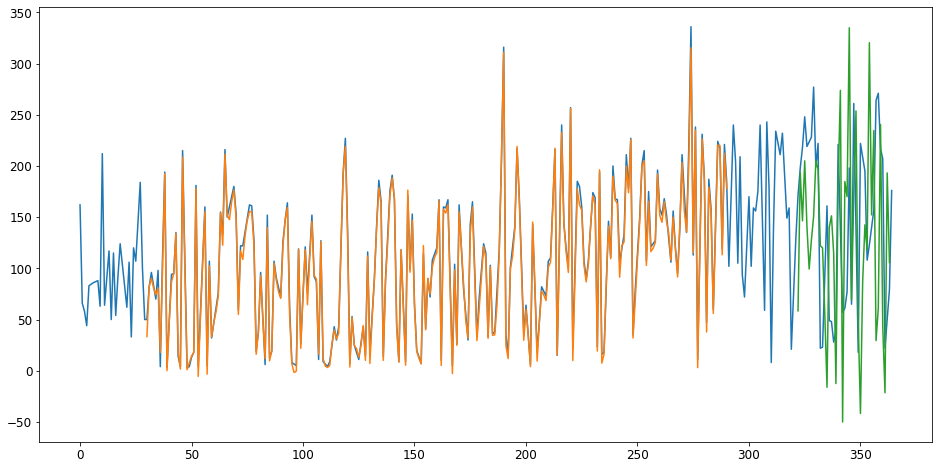

In [48]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(8, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 400, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 56.86 RMSE
Score em Teste: 84.14 RMSE


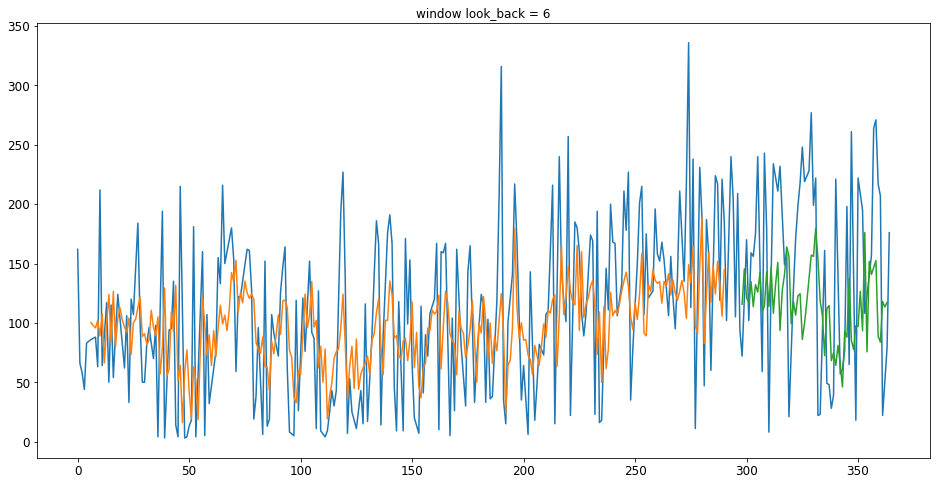

In [24]:
# Plot do baseline e previsões
plt.title('window look_back = 6')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

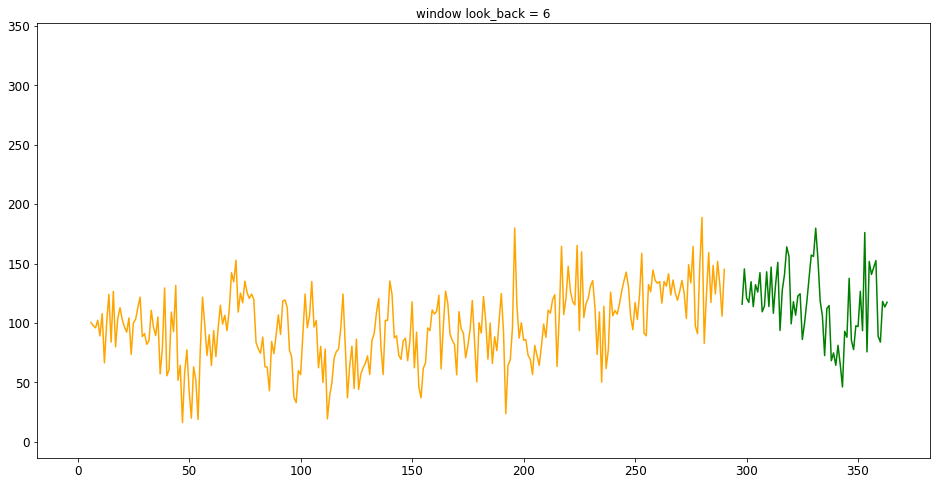

In [25]:
# Plot do baseline e previsões
plt.title('window look_back = 6')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [39]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 38.21 RMSE
Score em Teste: 97.04 RMSE


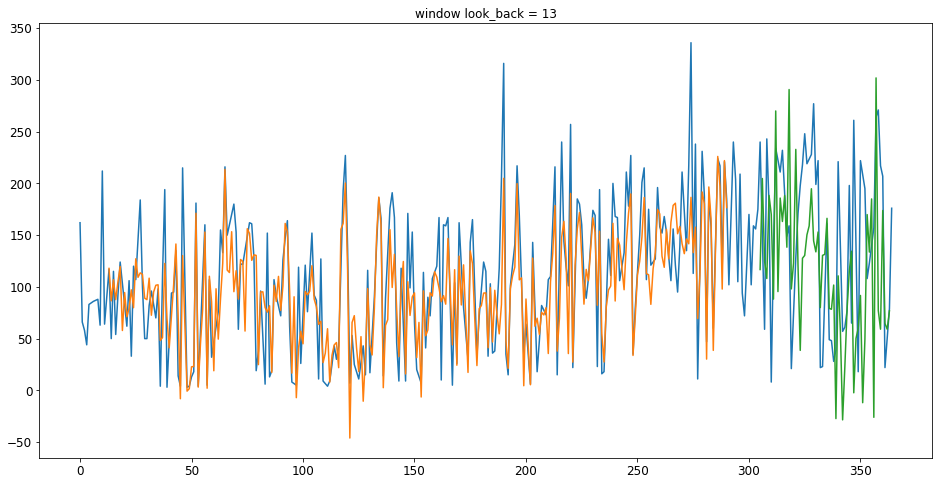

In [40]:
# Plot do baseline e previsões
plt.title('window look_back = 13')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

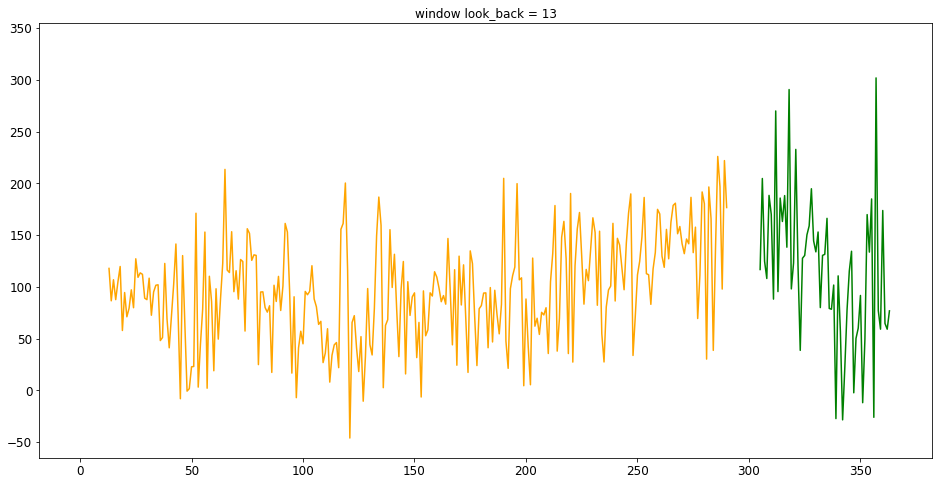

In [41]:
# Plot do baseline e previsões
plt.title('window look_back = 13')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [44]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 22.26 RMSE
Score em Teste: 127.68 RMSE


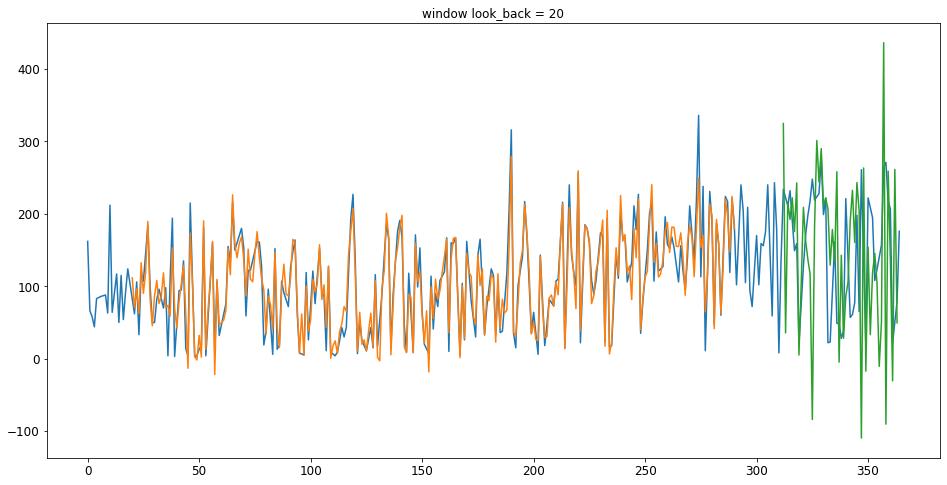

In [45]:
# Plot do baseline e previsões
plt.title('window look_back = 20')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

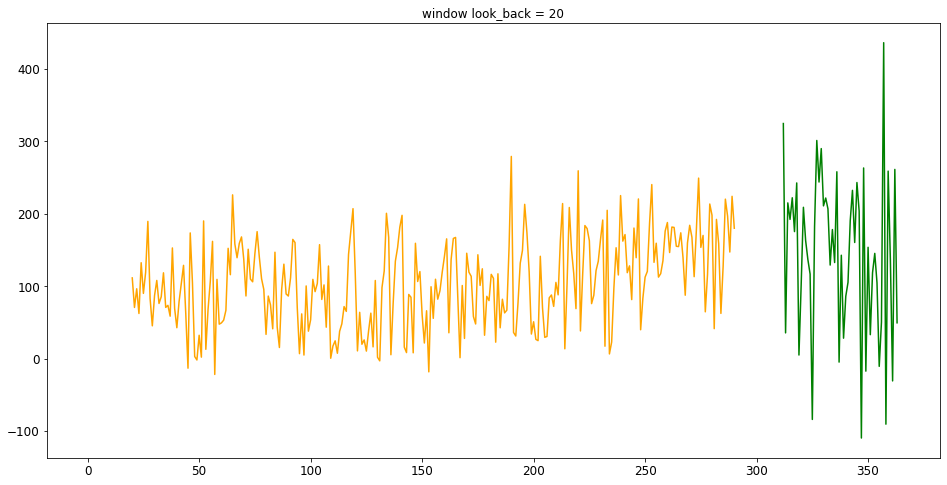

In [46]:
# Plot do baseline e previsões
plt.title('window look_back = 20')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [49]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 5.78 RMSE
Score em Teste: 111.92 RMSE


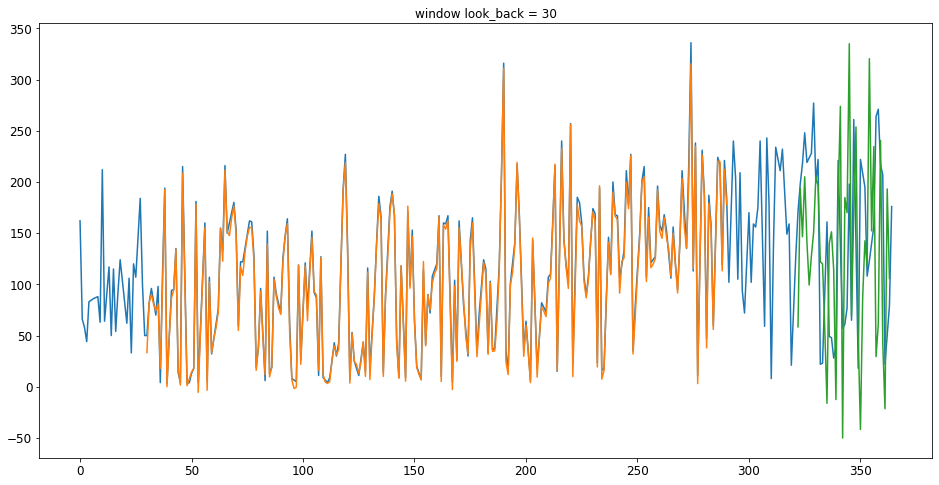

In [50]:
# Plot do baseline e previsões
plt.title('window look_back = 30')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

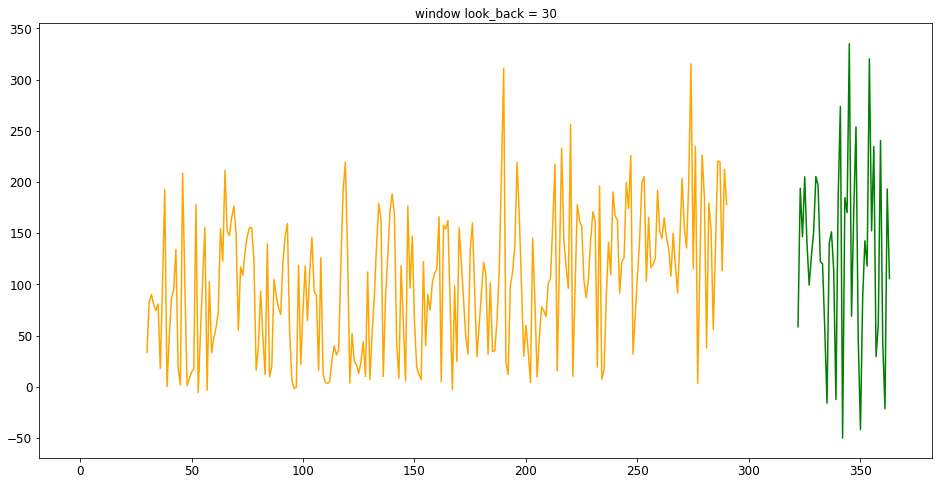

In [51]:
# Plot do baseline e previsões
plt.title('window look_back = 30')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

## Prevendo Séries Temporais com LSTMs e Time Steps

Você pode ter notado que a preparação de dados para a rede LSTM inclui etapas de tempo (time steps). Alguns problemas de sequência podem ter uma série variada de etapas de tempo por amostra. Por exemplo, você pode ter medidas de uma máquina industrial levando a um ponto de falha ou a um ponto de aumento de performance. Cada incidente seria uma amostra, as observações que levaram ao evento seriam os passos de tempo e as variáveis observadas seriam os recursos. Passos de tempo fornecem outras forma de tratar nosso problema de séries temporais. Como o exemplo acima usando o método Window, podemos ter passos de tempo anteriores em nossas séries temporais como entradas para prever a saída no próximo passo.

Em vez de reescrever as observações passadas como características de entrada separadas, podemos usá-las como passos de tempo de uma característica (atributo) de entrada, que é realmente um enquadramento mais preciso do problema. Podemos fazer isso usando a mesma representação de dados que no exemplo anterior do método window, exceto quando fazemos o reshape dos dados, onde definimos as colunas como a dimensão time step e alteramos a dimensão das features de volta para 1.

O método window cria novos recursos, como novos atributos para o modelo, enquanto os timesteps são uma sequência dentro de um lote para um determinado recurso.

In [11]:
# Carrega o dataset
#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

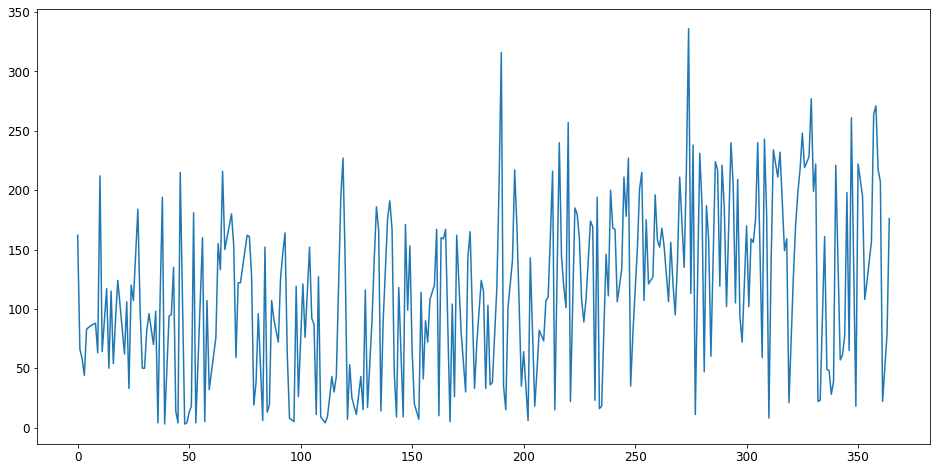

In [26]:
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

Epoch 1/400
278/278 - 4s - loss: 0.0530
Epoch 2/400
278/278 - 1s - loss: 0.0376
Epoch 3/400
278/278 - 1s - loss: 0.0366
Epoch 4/400
278/278 - 1s - loss: 0.0367
Epoch 5/400
278/278 - 1s - loss: 0.0359
Epoch 6/400
278/278 - 1s - loss: 0.0358
Epoch 7/400
278/278 - 1s - loss: 0.0357
Epoch 8/400
278/278 - 1s - loss: 0.0356
Epoch 9/400
278/278 - 1s - loss: 0.0357
Epoch 10/400
278/278 - 1s - loss: 0.0348
Epoch 11/400
278/278 - 1s - loss: 0.0350
Epoch 12/400
278/278 - 1s - loss: 0.0353
Epoch 13/400
278/278 - 1s - loss: 0.0355
Epoch 14/400
278/278 - 1s - loss: 0.0352
Epoch 15/400
278/278 - 1s - loss: 0.0347
Epoch 16/400
278/278 - 1s - loss: 0.0350
Epoch 17/400
278/278 - 1s - loss: 0.0353
Epoch 18/400
278/278 - 1s - loss: 0.0354
Epoch 19/400
278/278 - 1s - loss: 0.0350
Epoch 20/400
278/278 - 1s - loss: 0.0351
Epoch 21/400
278/278 - 1s - loss: 0.0349
Epoch 22/400
278/278 - 1s - loss: 0.0348
Epoch 23/400
278/278 - 1s - loss: 0.0347
Epoch 24/400
278/278 - 1s - loss: 0.0348
Epoch 25/400
278/278 - 1s

Epoch 199/400
278/278 - 1s - loss: 0.0306
Epoch 200/400
278/278 - 1s - loss: 0.0304
Epoch 201/400
278/278 - 1s - loss: 0.0306
Epoch 202/400
278/278 - 1s - loss: 0.0304
Epoch 203/400
278/278 - 1s - loss: 0.0303
Epoch 204/400
278/278 - 1s - loss: 0.0305
Epoch 205/400
278/278 - 1s - loss: 0.0304
Epoch 206/400
278/278 - 1s - loss: 0.0304
Epoch 207/400
278/278 - 1s - loss: 0.0301
Epoch 208/400
278/278 - 1s - loss: 0.0305
Epoch 209/400
278/278 - 1s - loss: 0.0307
Epoch 210/400
278/278 - 1s - loss: 0.0304
Epoch 211/400
278/278 - 1s - loss: 0.0302
Epoch 212/400
278/278 - 1s - loss: 0.0302
Epoch 213/400
278/278 - 1s - loss: 0.0300
Epoch 214/400
278/278 - 1s - loss: 0.0303
Epoch 215/400
278/278 - 1s - loss: 0.0305
Epoch 216/400
278/278 - 1s - loss: 0.0307
Epoch 217/400
278/278 - 1s - loss: 0.0304
Epoch 218/400
278/278 - 1s - loss: 0.0299
Epoch 219/400
278/278 - 1s - loss: 0.0304
Epoch 220/400
278/278 - 1s - loss: 0.0303
Epoch 221/400
278/278 - 1s - loss: 0.0299
Epoch 222/400
278/278 - 1s - loss:

278/278 - 1s - loss: 0.0214
Epoch 395/400
278/278 - 1s - loss: 0.0215
Epoch 396/400
278/278 - 1s - loss: 0.0216
Epoch 397/400
278/278 - 1s - loss: 0.0216
Epoch 398/400
278/278 - 1s - loss: 0.0214
Epoch 399/400
278/278 - 1s - loss: 0.0212
Epoch 400/400
278/278 - 1s - loss: 0.0214
Score em Treino: 47.39 RMSE
Score em Teste: 85.44 RMSE


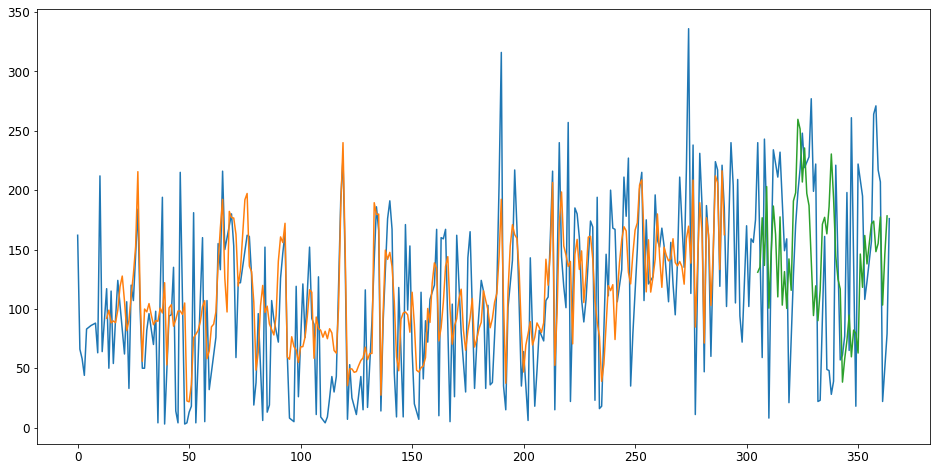

In [27]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 13
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(8, input_shape = (None, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 400, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 47.39 RMSE
Score em Teste: 85.44 RMSE


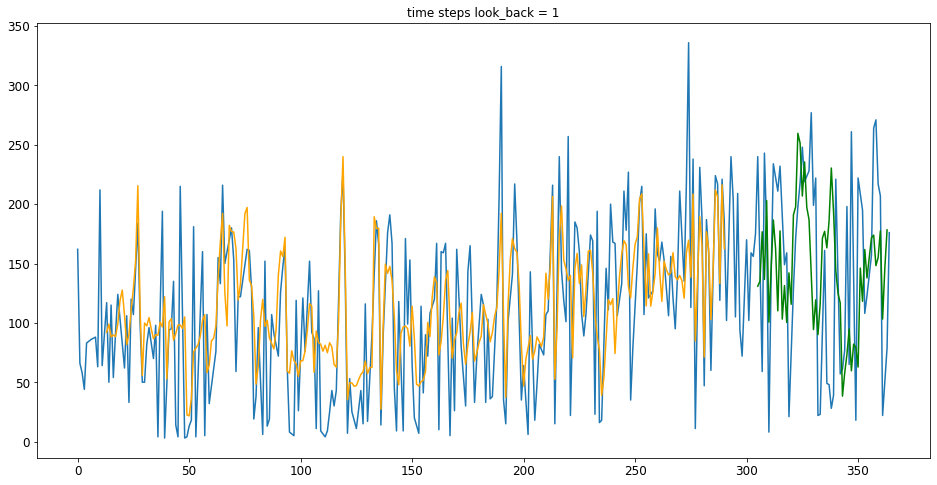

In [32]:
# Plot do baseline e previsões
plt.title('time steps look_back = 1')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

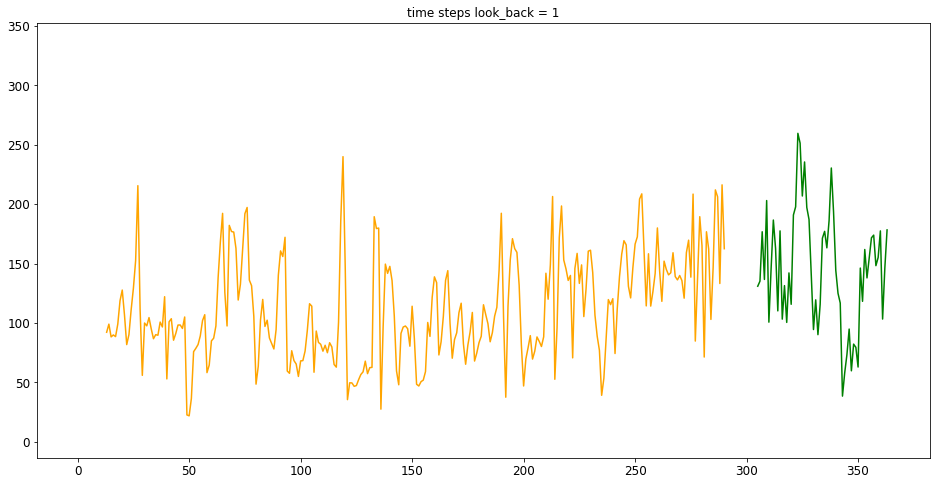

In [33]:
# Plot do baseline e previsões
plt.title('time steps look_back = 1')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [114]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 57.81 RMSE
Score em Teste: 77.73 RMSE


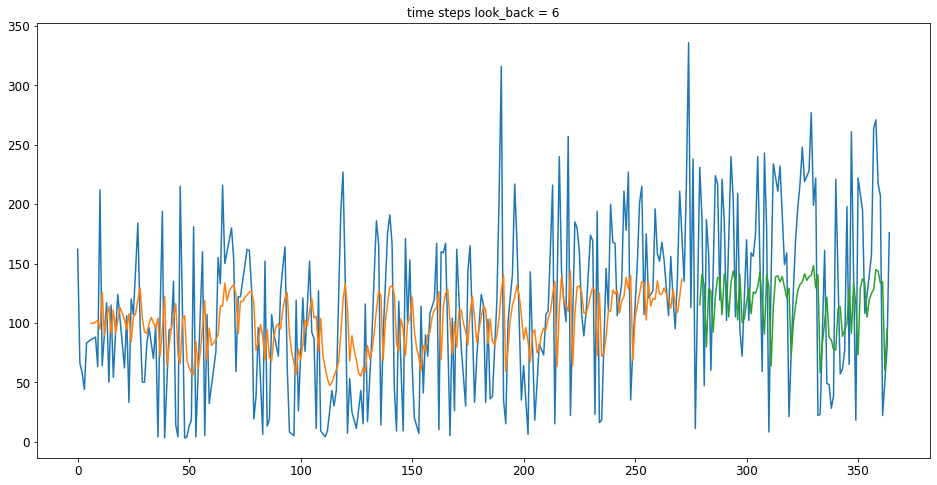

In [115]:
# Plot do baseline e previsões
plt.title('time steps look_back = 6')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

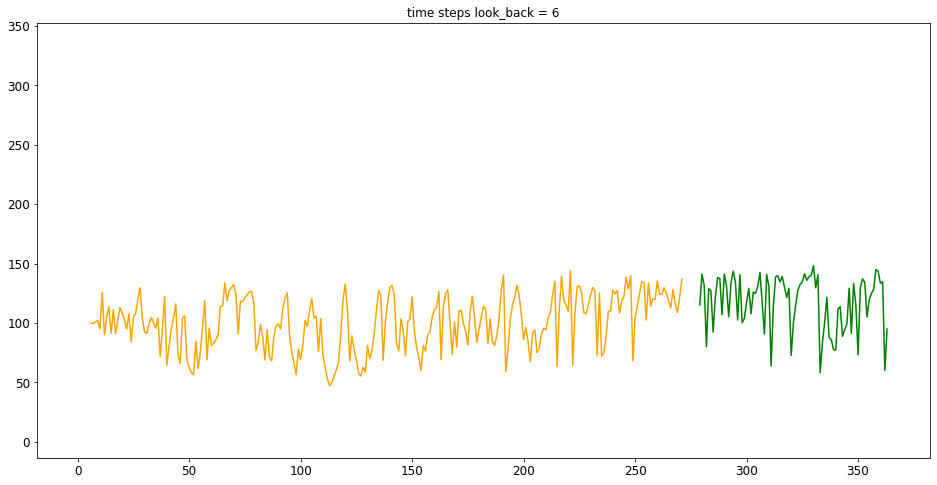

In [116]:
# Plot do baseline e previsões
plt.title('time steps look_back = 6')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [34]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 47.39 RMSE
Score em Teste: 85.44 RMSE


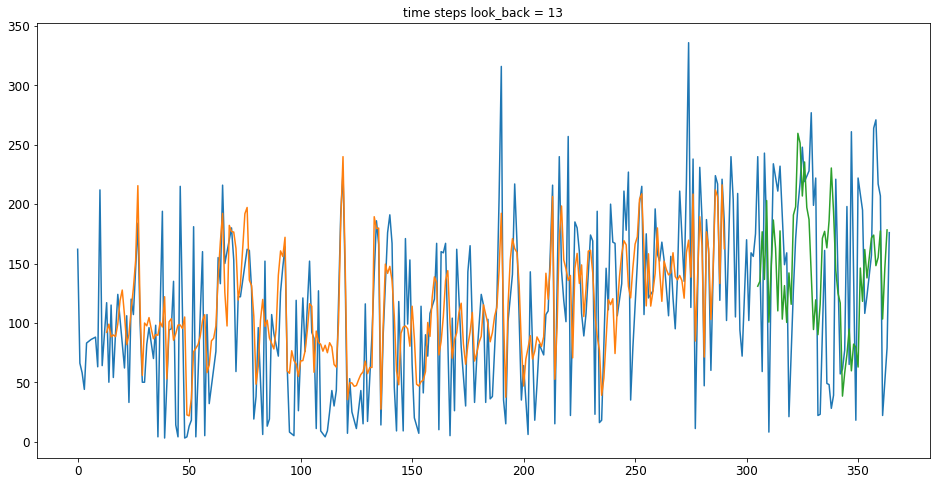

In [35]:
# Plot do baseline e previsões
plt.title('time steps look_back = 13')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

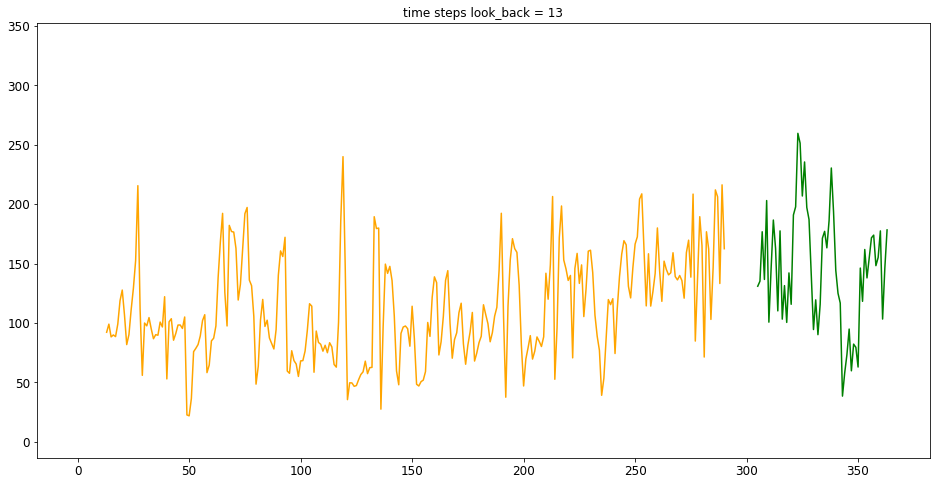

In [36]:
# Plot do baseline e previsões
plt.title('time steps look_back = 13')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [125]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 57.17 RMSE
Score em Teste: 85.61 RMSE


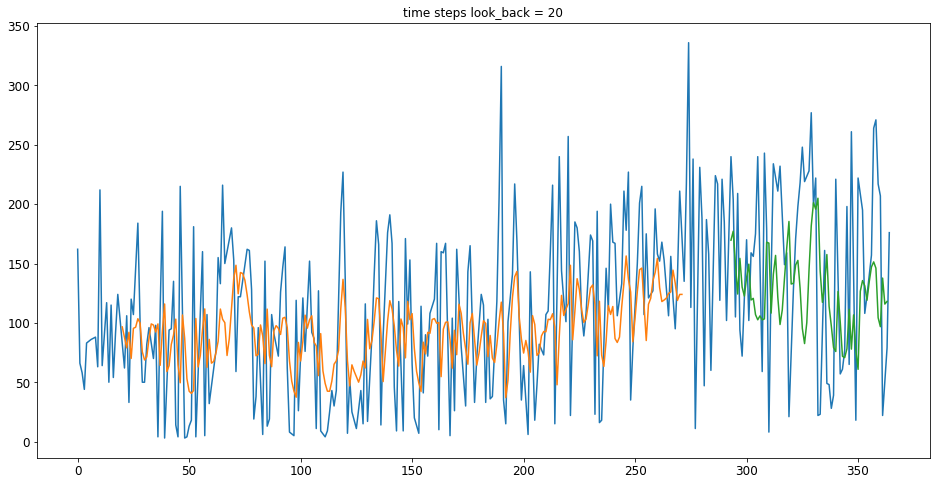

In [126]:
# Plot do baseline e previsões
plt.title('time steps look_back = 20')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

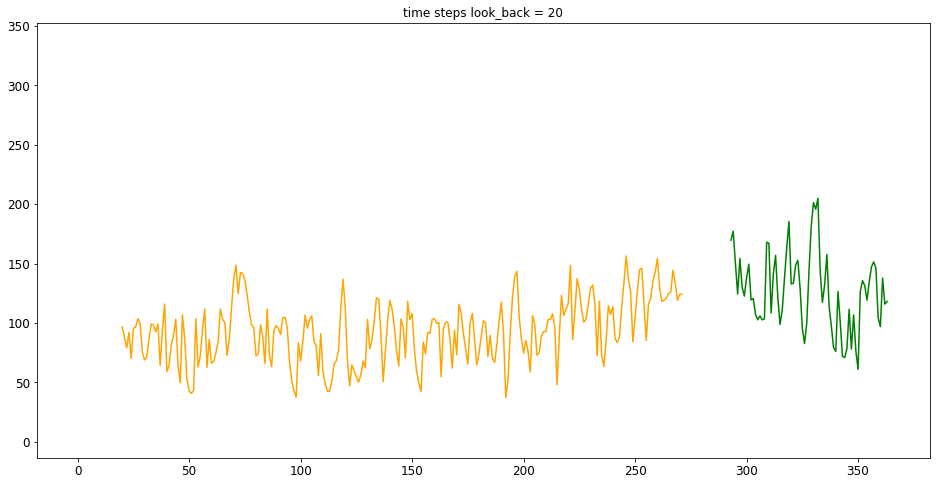

In [127]:
# Plot do baseline e previsões
plt.title('time steps look_back = 20')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [130]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 58.55 RMSE
Score em Teste: 75.89 RMSE


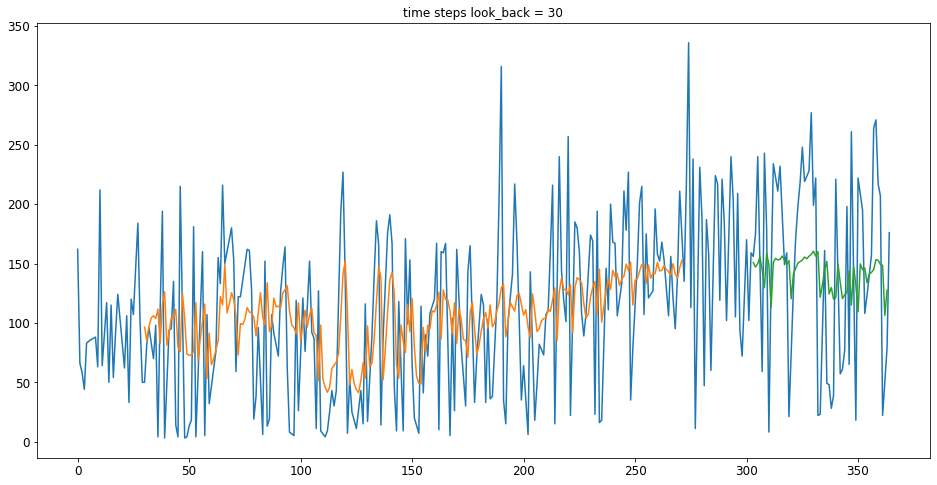

In [131]:
# Plot do baseline e previsões
plt.title('time steps look_back = 30')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

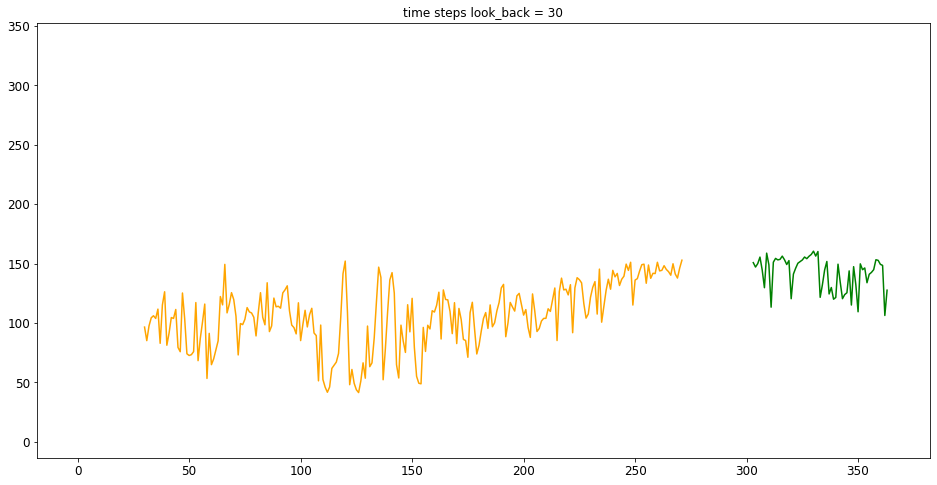

In [132]:
# Plot do baseline e previsões
plt.title('time steps look_back = 30')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

## Prevendo Séries Temporais com LSTMs e Memória Entre Batches

## LSTMs Stateful x Stateless

Uma LSTM prevê com base na ativação da célula de memória no timestep anterior. Você então deve copiar essa ativação entre lotes? Ou você define todas as ativações como zeros? Isso é o que distingue uma LSTM com estado (stateful) e sem estado (stateless). Portanto, o estado refere-se a ativações de neurônios, não aos parâmetros (que são mantidos em ambos os casos).

Quando devemos usar LSTMs em modo stateful ou stateless?

Depende se você deseja que as previsões no lote n dependam do estado no lote n-1. Por exemplo, na modelagem de linguagem, os lotes sucessivos são trocas sucessivas de texto, por isso faz sentido manter o estado. Mas se você sabe que os lotes sucessivos não estão relacionados entre si, talvez seja mais sensato redefinir o estado.

"Stateless" é como redefinir a LSTM para um "estado inicial" a cada novo lote, e 'stateful' significa que você continua de onde você está. Em ambos os casos, a LSTM está aprendendo porque as probabilidades de transição são atualizadas.

A LSTM stateless deve ser usada se as instâncias de diferentes lotes forem independentes, por exemplo, ao modelar padrões de nível de sentença e cada instância for uma frase - o estado deve ser redefinido para "início de sentença" para cada nova instância. LSTM stateful é mais útil se houver continuidade entre a iª instância de todos os lotes, por exemplo, ao modelar padrões de nível de documento (sem redefinir os limites das orações) ou séries temporais. Neste caso, a i-ésima instância de cada lote deve ser as frases consequentes do i-ésimo documento.

## Memória Entre Batches

A rede LSTM possui memória que é capaz de se lembrar através de sequências longas. Normalmente, o estado dentro da rede é reiniciado após cada lote de treinamento ao chamar modelo.fit(), bem como cada chamada para model.predict() ou model.evaluate(). Nós podemos controlar quando o estado interno da rede LSTM é apagado no Keras, fazendo a camada LSTM com estado (usando o parâmetro stateful). Isso significa que podemos criar estado em toda a sequência de treinamento e até mesmo manter esse estado, se necessário, para fazer previsões.

Esta técnica exige que os dados de treino não sejam "shuffled" durante o treinamento da rede. Também requer reinicialização explícita do estado da rede após cada exposição aos dados de treinamento (epoch) com chamadas para model.reset_states(). Isso significa que devemos criar nosso próprio ciclo externo de épocas e dentro de cada epoch, fazer as chamadas a model.fit() e model.reset().

O módulo reset_states() limpa apenas os estados ocultos da sua rede. Vale a pena mencionar que, dependendo se a opção stateful = True foi configurada em sua rede - o comportamento desta função pode ser diferente. Se não estiver configurado - todos os estados são reiniciados automaticamente após cada cálculo de lote em sua rede (por exemplo, depois de chamar model.fit(), model.predict() e model.evaluate()). Caso contrário - você deve chamar reset_states() toda vez, quando quiser fazer chamadas de modelo consecutivas independentes.

Stateful = True geralmente é usado quando você deseja tratar lotes consecutivos como entradas consecutivas. Neste caso, o modelo está tratando lotes consecutivos como se estivessem no mesmo batch.

Quando a camada LSTM for criada, o parâmetro stateful = True deve ser definido e ao invés de especificar a dimensão de entrada, devemos informar o número de amostras em um batch, o número de time steps na amostra e o número de features no time step configurando o parâmetro batch_input_shape. Nossa camada LSTM ficará assim:

model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True))

O mesmo batch_size deve ser usado mais tarde para fazer as previsões: model.predict(trainX, batch_size=batch_size)

Configurar uma RNN com stateful = True significa que os estados para as amostras de cada lote serão reutilizados como estados iniciais para as amostras no próximo lote.

In [13]:
# Carrega o dataset
#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

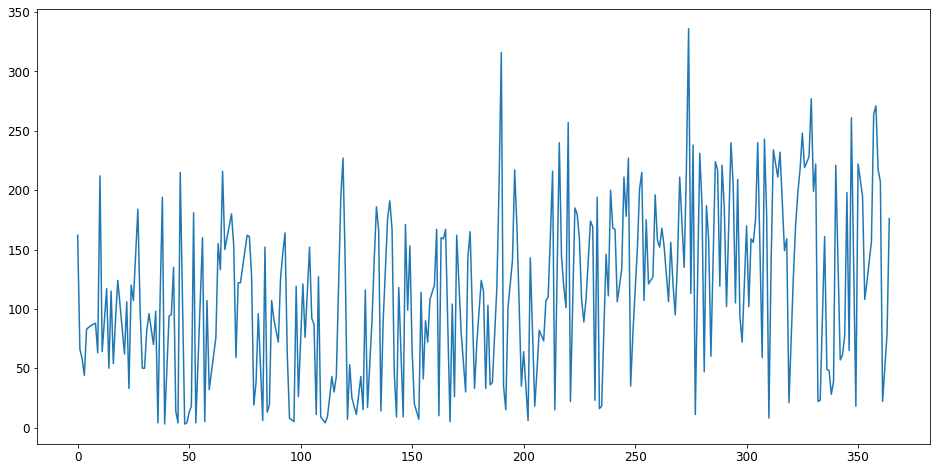

In [83]:
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

261/261 - 4s - loss: 0.0367
261/261 - 1s - loss: 0.0363
261/261 - 1s - loss: 0.0362
261/261 - 1s - loss: 0.0362
261/261 - 1s - loss: 0.0361
261/261 - 1s - loss: 0.0361
261/261 - 1s - loss: 0.0361
261/261 - 1s - loss: 0.0360
261/261 - 1s - loss: 0.0360
261/261 - 1s - loss: 0.0360
261/261 - 1s - loss: 0.0360
261/261 - 1s - loss: 0.0359
261/261 - 1s - loss: 0.0359
261/261 - 1s - loss: 0.0359
261/261 - 1s - loss: 0.0359
261/261 - 1s - loss: 0.0358
261/261 - 1s - loss: 0.0358
261/261 - 1s - loss: 0.0358
261/261 - 1s - loss: 0.0358
261/261 - 1s - loss: 0.0358
261/261 - 1s - loss: 0.0357
261/261 - 1s - loss: 0.0357
261/261 - 1s - loss: 0.0357
261/261 - 1s - loss: 0.0357
261/261 - 1s - loss: 0.0357
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0356
261/261 - 1s - loss: 0.0355
261/261 - 1s - loss: 0.0355
261/261 - 1s - loss: 0.0355
261/261 - 1s - loss: 0.0355
261/261 - 1s - loss:

261/261 - 1s - loss: 0.0276
261/261 - 1s - loss: 0.0279
261/261 - 1s - loss: 0.0275
261/261 - 1s - loss: 0.0280
261/261 - 1s - loss: 0.0271
261/261 - 1s - loss: 0.0276
261/261 - 1s - loss: 0.0279
261/261 - 1s - loss: 0.0277
261/261 - 1s - loss: 0.0271
261/261 - 1s - loss: 0.0278
261/261 - 1s - loss: 0.0269
261/261 - 1s - loss: 0.0276
261/261 - 1s - loss: 0.0271
261/261 - 1s - loss: 0.0278
261/261 - 1s - loss: 0.0270
261/261 - 1s - loss: 0.0272
261/261 - 1s - loss: 0.0278
261/261 - 1s - loss: 0.0270
261/261 - 1s - loss: 0.0276
261/261 - 1s - loss: 0.0270
261/261 - 1s - loss: 0.0268
261/261 - 1s - loss: 0.0275
261/261 - 1s - loss: 0.0273
261/261 - 1s - loss: 0.0268
261/261 - 1s - loss: 0.0275
261/261 - 1s - loss: 0.0267
261/261 - 1s - loss: 0.0270
261/261 - 1s - loss: 0.0271
261/261 - 1s - loss: 0.0267
261/261 - 1s - loss: 0.0272
261/261 - 1s - loss: 0.0266
261/261 - 1s - loss: 0.0275
261/261 - 1s - loss: 0.0263
261/261 - 1s - loss: 0.0270
261/261 - 1s - loss: 0.0272
261/261 - 1s - loss:

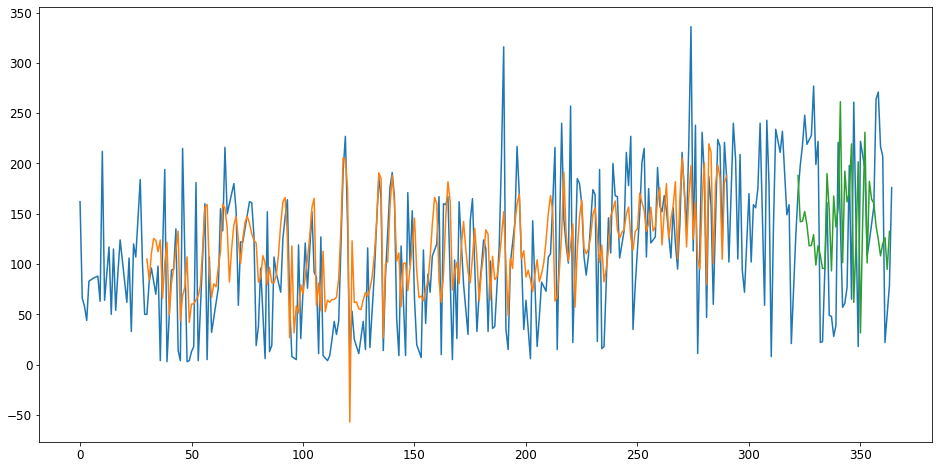

In [84]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(8, batch_input_shape = (batch_size, look_back, 1), stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(400):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# Previsões
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 61.18 RMSE
Score em Teste: 129.04 RMSE


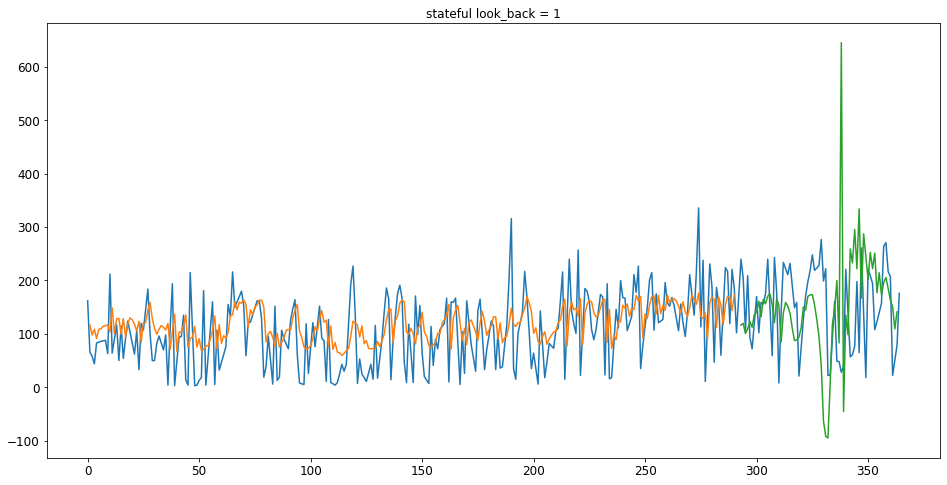

In [56]:
# Plot do baseline e previsões
plt.title('stateful look_back = 1')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

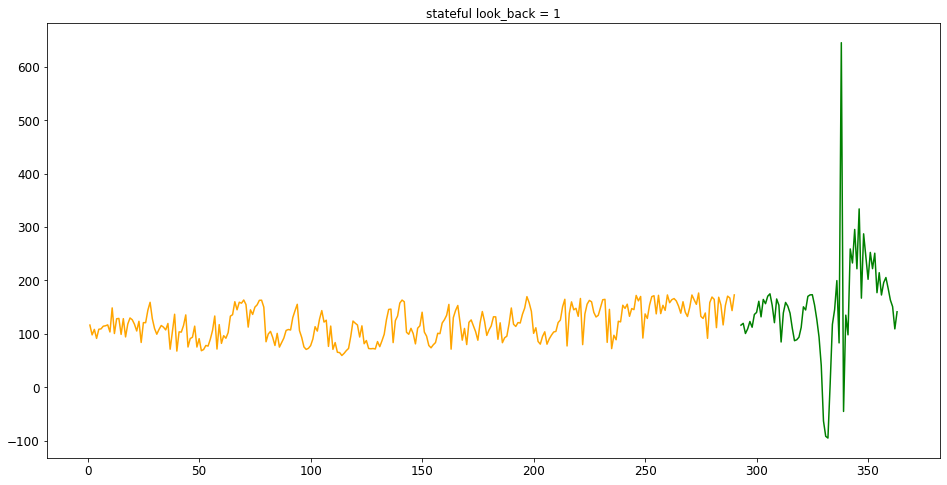

In [57]:
# Plot do baseline e previsões
plt.title('stateful look_back = 1')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [60]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 59.67 RMSE
Score em Teste: 79.42 RMSE


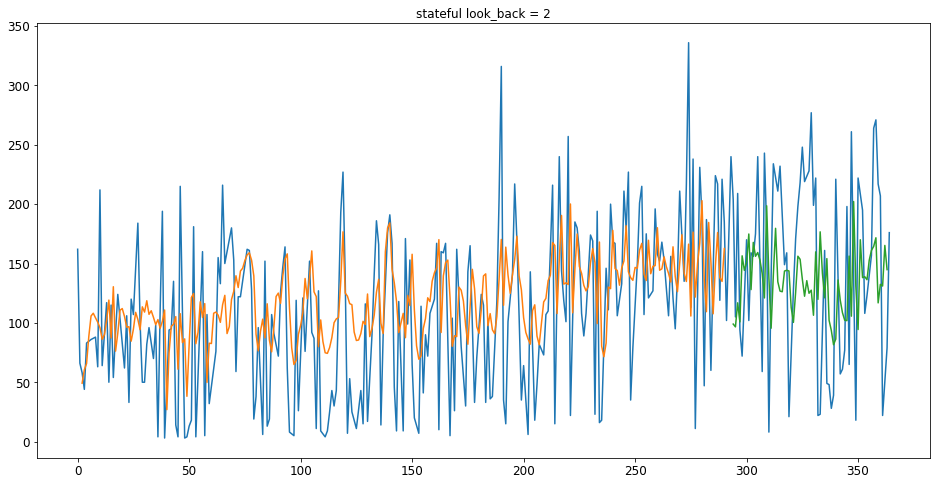

In [61]:
# Plot do baseline e previsões
plt.title('stateful look_back = 2')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

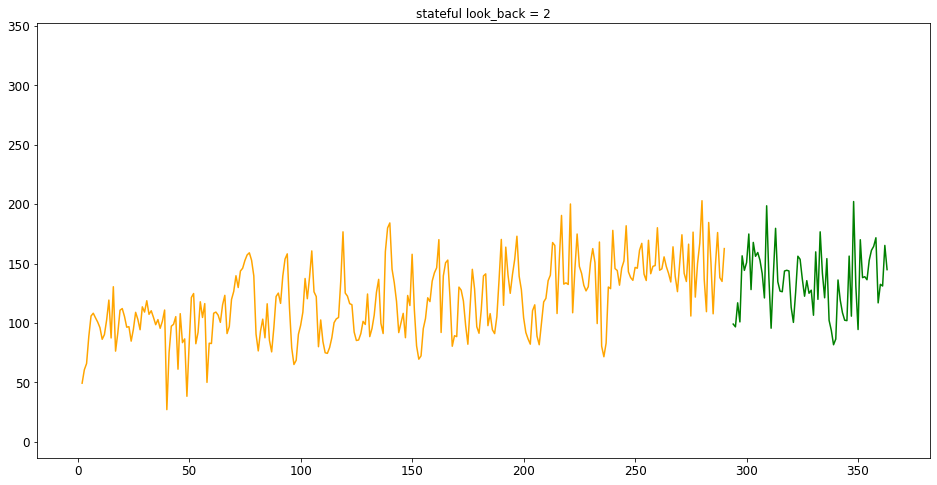

In [62]:
# Plot do baseline e previsões
plt.title('stateful look_back = 2')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [65]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 61.81 RMSE
Score em Teste: 78.91 RMSE


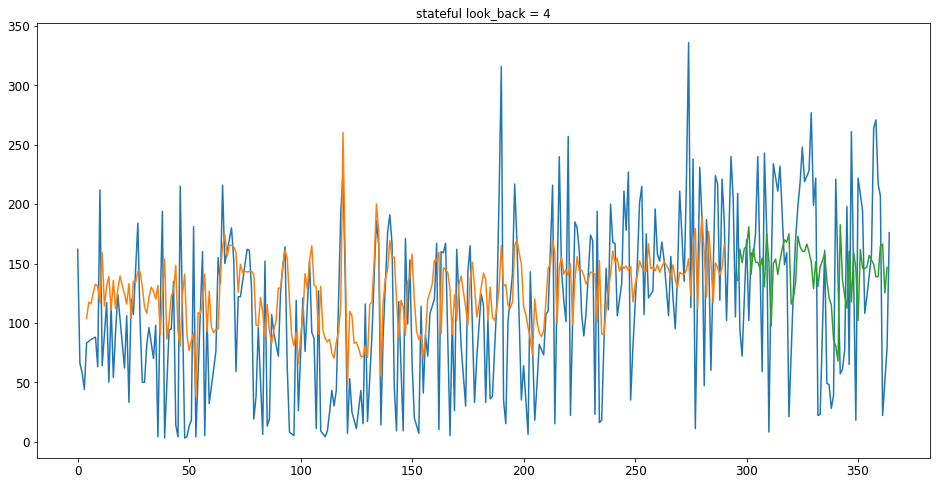

In [66]:
# Plot do baseline e previsões
plt.title('stateful look_back = 4')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

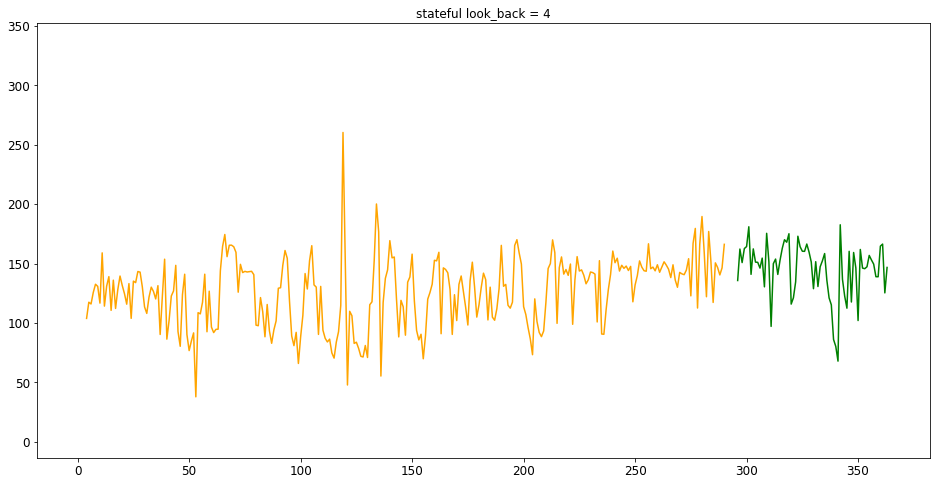

In [67]:
# Plot do baseline e previsões
plt.title('stateful look_back = 4')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [70]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 57.03 RMSE
Score em Teste: 78.34 RMSE


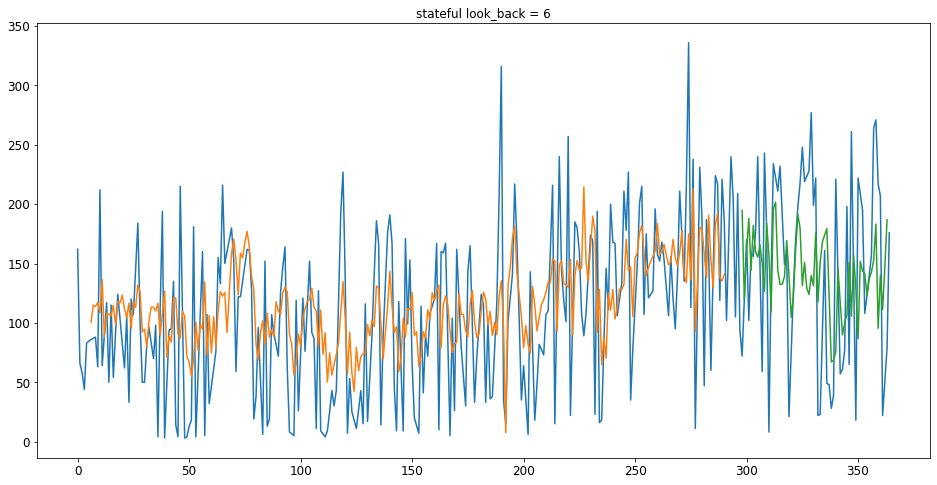

In [71]:
# Plot do baseline e previsões
plt.title('stateful look_back = 6')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

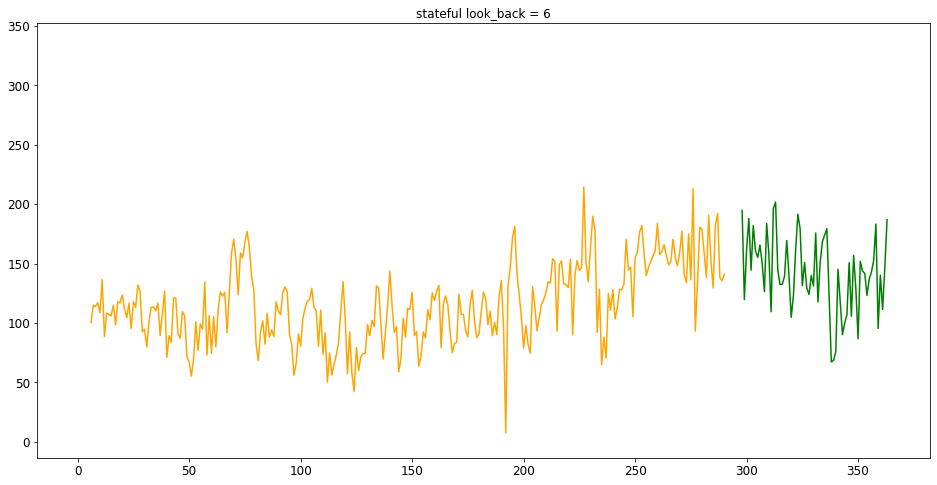

In [72]:
# Plot do baseline e previsões
plt.title('stateful look_back = 6')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [75]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 45.85 RMSE
Score em Teste: 97.67 RMSE


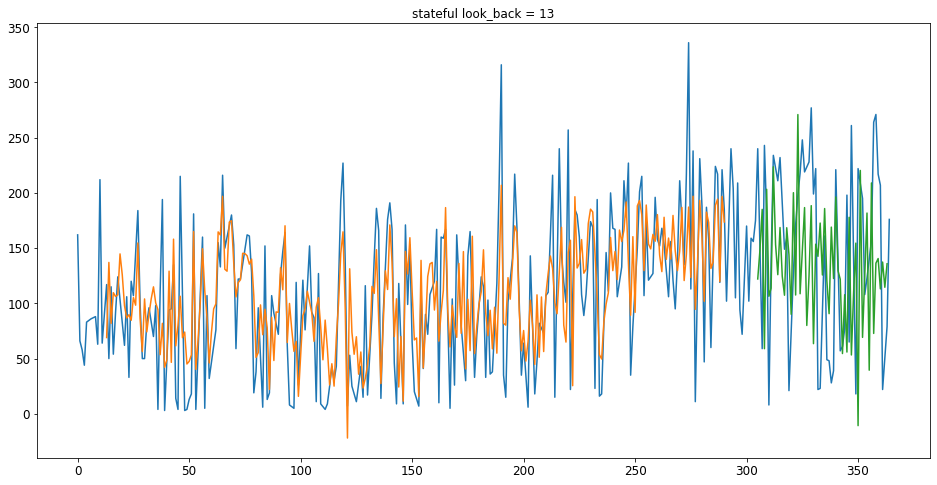

In [76]:
# Plot do baseline e previsões
plt.title('stateful look_back = 13')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

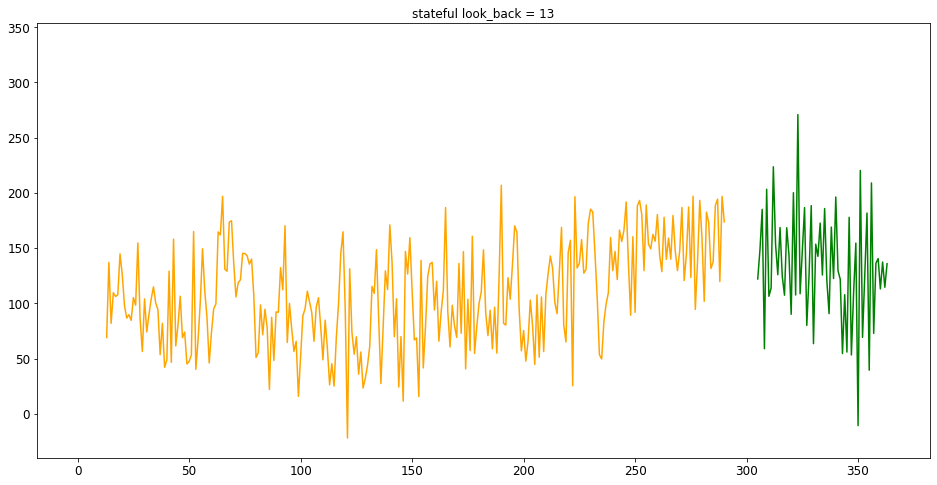

In [77]:
# Plot do baseline e previsões
plt.title('stateful look_back = 13')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [80]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 51.29 RMSE
Score em Teste: 92.80 RMSE


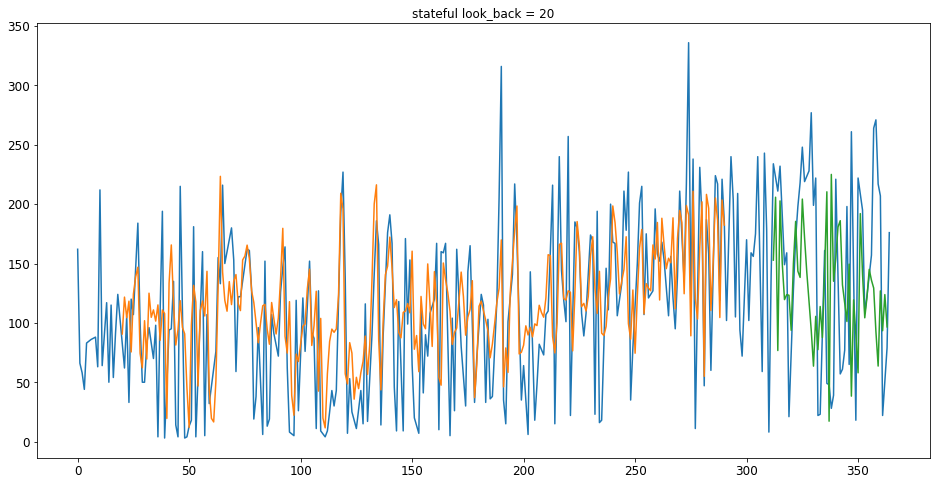

In [81]:
# Plot do baseline e previsões
plt.title('stateful look_back = 20')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

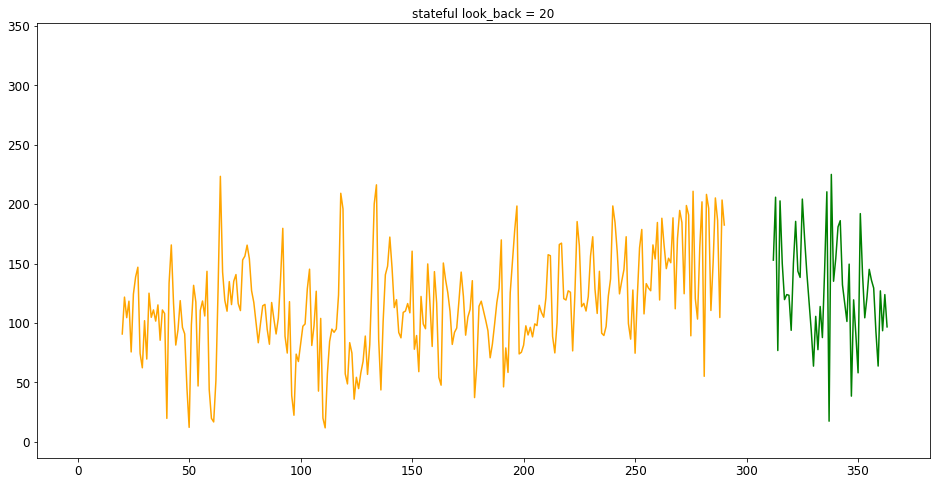

In [82]:
# Plot do baseline e previsões
plt.title('stateful look_back = 20')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [85]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 54.28 RMSE
Score em Teste: 98.63 RMSE


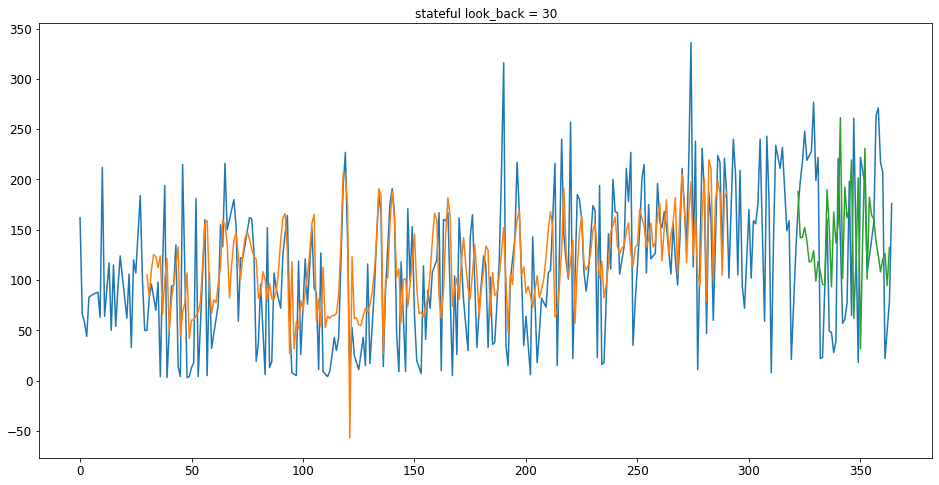

In [86]:
# Plot do baseline e previsões
plt.title('stateful look_back = 30')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

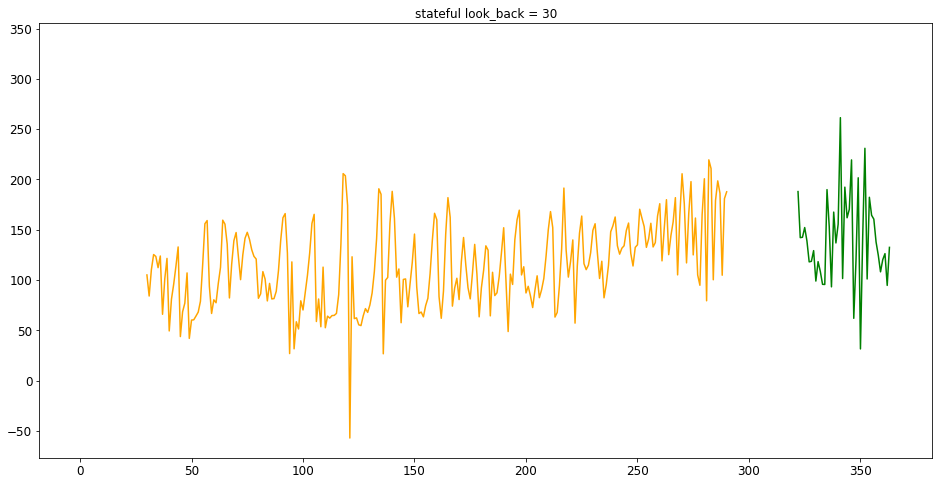

In [87]:
# Plot do baseline e previsões
plt.title('stateful look_back = 30')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

## Prevendo Séries Temporais com Stacked LSTMs 

Finalmente, vejamos um dos maiores benefícios das LSTMs, o fato de que elas podem ser treinadas com sucesso quando empilhadas em arquiteturas de redes profundas. As redes LSTM podem ser empilhadas em Keras da mesma maneira que outros tipos de camada podem ser empilhadas. Uma adição é que a camada LSTM anterior a cada camada LSTM subsequente, deve retornar a sequência. Isso pode ser feito configurando o parâmetro return_sequences = True na camada 1. 

In [15]:
# Carrega o dataset
#dataframe = pandas.read_csv('passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
#dataset = dataframe.values
#dataset = dataset.astype('float32')

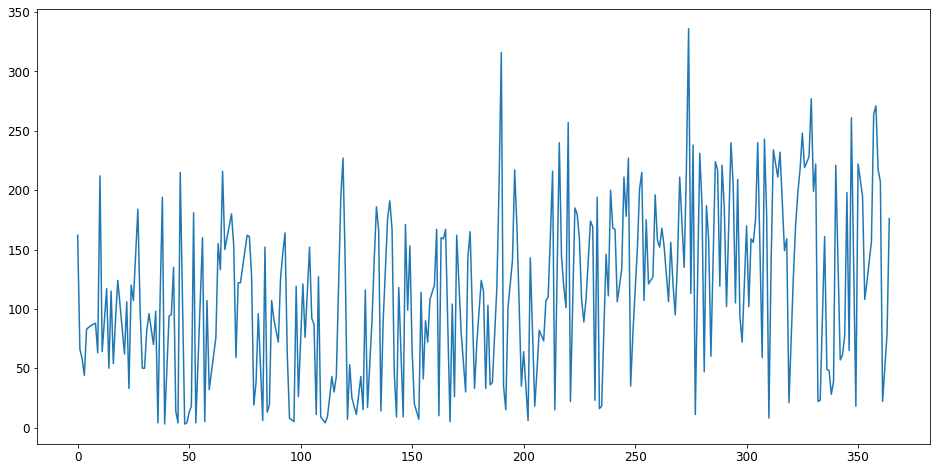

In [118]:
dataset=dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

261/261 - 7s - loss: 0.0388
261/261 - 2s - loss: 0.0381
261/261 - 2s - loss: 0.0378
261/261 - 2s - loss: 0.0376
261/261 - 2s - loss: 0.0374
261/261 - 2s - loss: 0.0373
261/261 - 2s - loss: 0.0372
261/261 - 2s - loss: 0.0371
261/261 - 2s - loss: 0.0370
261/261 - 2s - loss: 0.0369
261/261 - 2s - loss: 0.0368
261/261 - 2s - loss: 0.0367
261/261 - 2s - loss: 0.0367
261/261 - 2s - loss: 0.0366
261/261 - 2s - loss: 0.0365
261/261 - 2s - loss: 0.0365
261/261 - 2s - loss: 0.0364
261/261 - 2s - loss: 0.0363
261/261 - 2s - loss: 0.0363
261/261 - 2s - loss: 0.0362
261/261 - 2s - loss: 0.0362
261/261 - 2s - loss: 0.0361
261/261 - 2s - loss: 0.0360
261/261 - 2s - loss: 0.0360
261/261 - 2s - loss: 0.0359
261/261 - 2s - loss: 0.0359
261/261 - 2s - loss: 0.0358
261/261 - 2s - loss: 0.0357
261/261 - 2s - loss: 0.0357
261/261 - 2s - loss: 0.0356
261/261 - 2s - loss: 0.0356
261/261 - 2s - loss: 0.0355
261/261 - 2s - loss: 0.0355
261/261 - 2s - loss: 0.0355
261/261 - 2s - loss: 0.0354
261/261 - 2s - loss:

261/261 - 2s - loss: 0.0138
261/261 - 2s - loss: 0.0136
261/261 - 2s - loss: 0.0152
261/261 - 2s - loss: 0.0138
261/261 - 3s - loss: 0.0168
261/261 - 2s - loss: 0.0141
261/261 - 2s - loss: 0.0136
261/261 - 2s - loss: 0.0151
261/261 - 2s - loss: 0.0122
261/261 - 2s - loss: 0.0137
261/261 - 2s - loss: 0.0163
261/261 - 2s - loss: 0.0182
261/261 - 2s - loss: 0.0151
261/261 - 2s - loss: 0.0141
261/261 - 2s - loss: 0.0122
261/261 - 2s - loss: 0.0131
261/261 - 2s - loss: 0.0117
261/261 - 2s - loss: 0.0123
261/261 - 2s - loss: 0.0121
261/261 - 2s - loss: 0.0135
261/261 - 2s - loss: 0.0129
261/261 - 2s - loss: 0.0137
261/261 - 2s - loss: 0.0137
261/261 - 2s - loss: 0.0145
261/261 - 2s - loss: 0.0148
261/261 - 2s - loss: 0.0130
261/261 - 2s - loss: 0.0120
261/261 - 2s - loss: 0.0128
261/261 - 2s - loss: 0.0116
261/261 - 2s - loss: 0.0118
261/261 - 2s - loss: 0.0131
261/261 - 2s - loss: 0.0125
261/261 - 2s - loss: 0.0111
261/261 - 2s - loss: 0.0115
261/261 - 2s - loss: 0.0102
261/261 - 2s - loss:

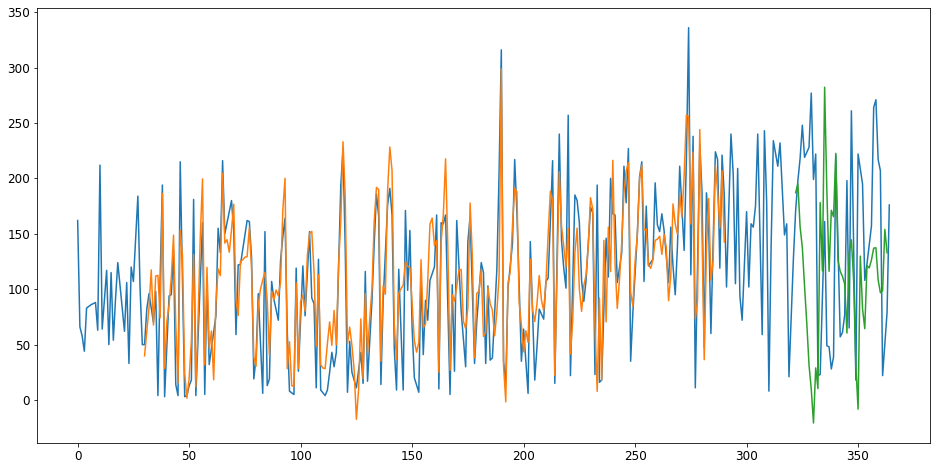

In [119]:
# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(8, batch_input_shape = (batch_size, look_back, 1), stateful = True, return_sequences = True))
model.add(LSTM(8, batch_input_shape = (batch_size, look_back, 1), stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(400):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# Previsões
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [90]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 54.08 RMSE
Score em Teste: 105.55 RMSE


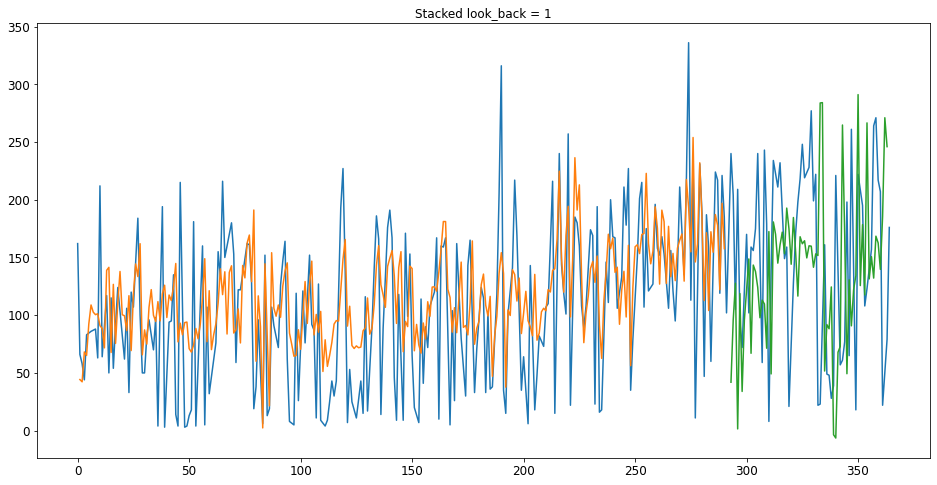

In [91]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 1')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

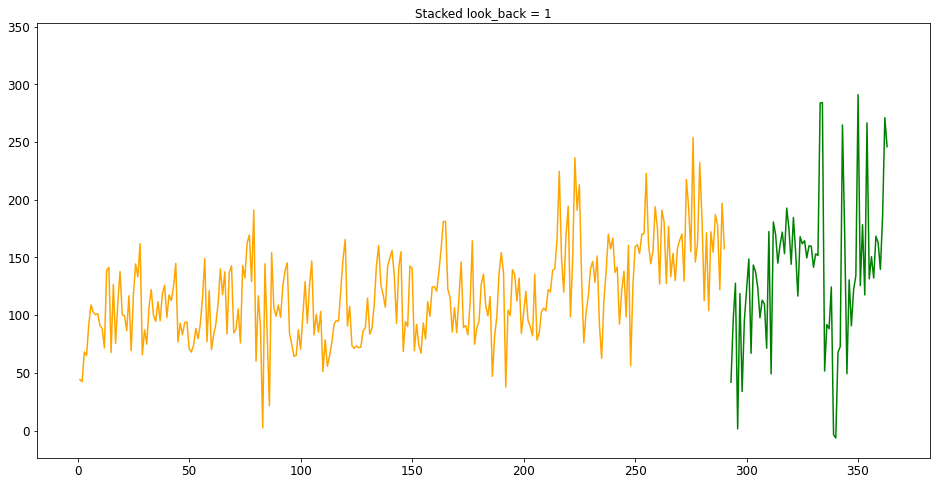

In [92]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 1')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [95]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 55.40 RMSE
Score em Teste: 87.72 RMSE


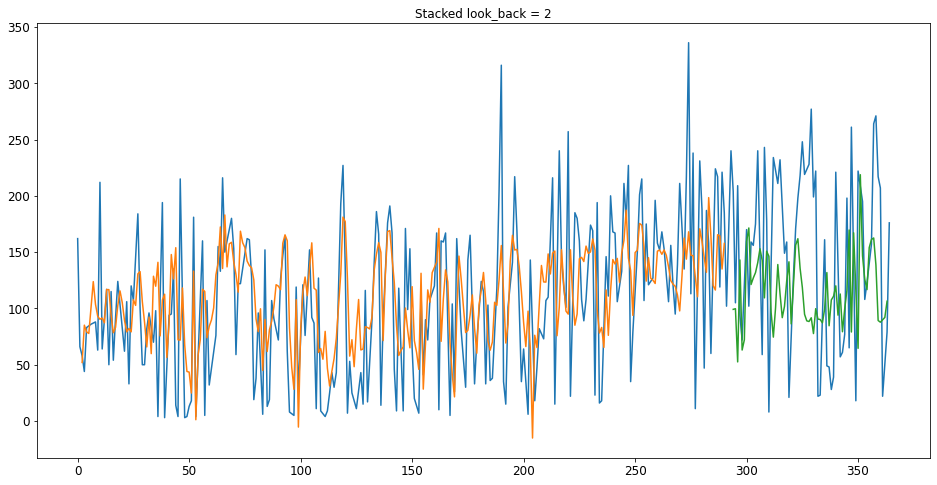

In [96]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 2')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

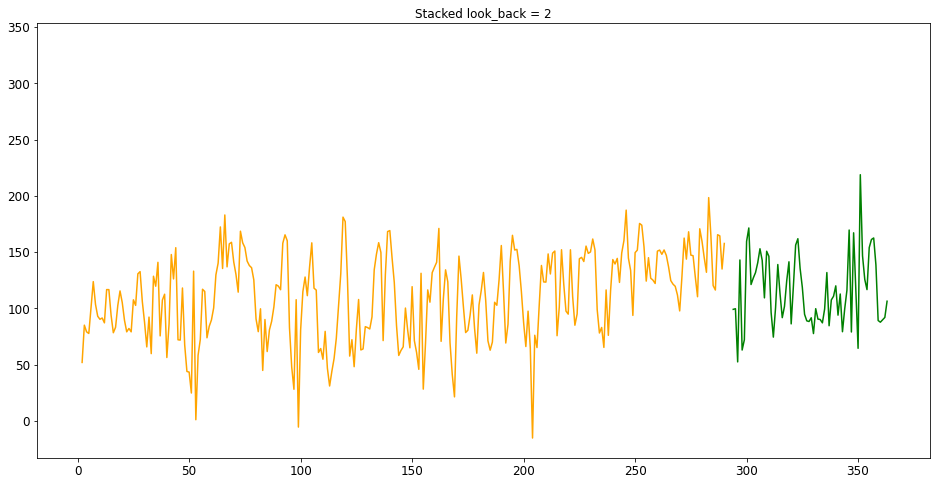

In [97]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 2')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [100]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 38.44 RMSE
Score em Teste: 94.31 RMSE


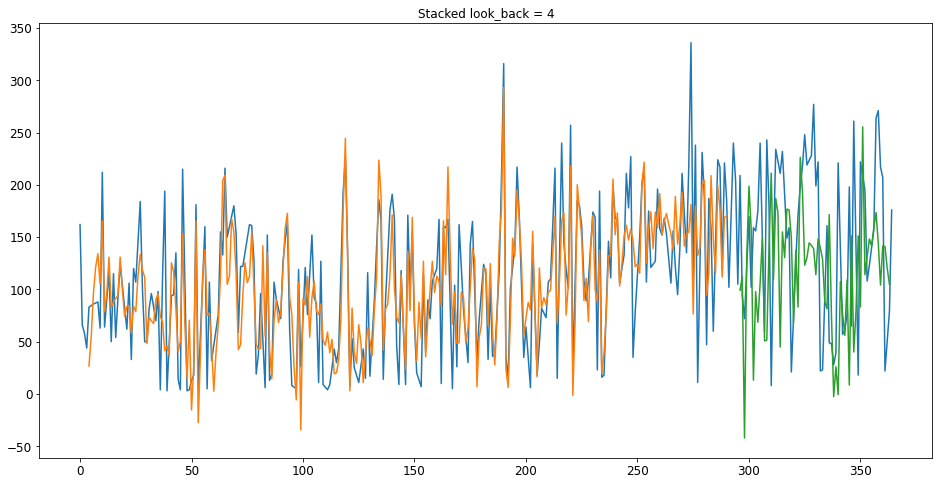

In [101]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 4')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

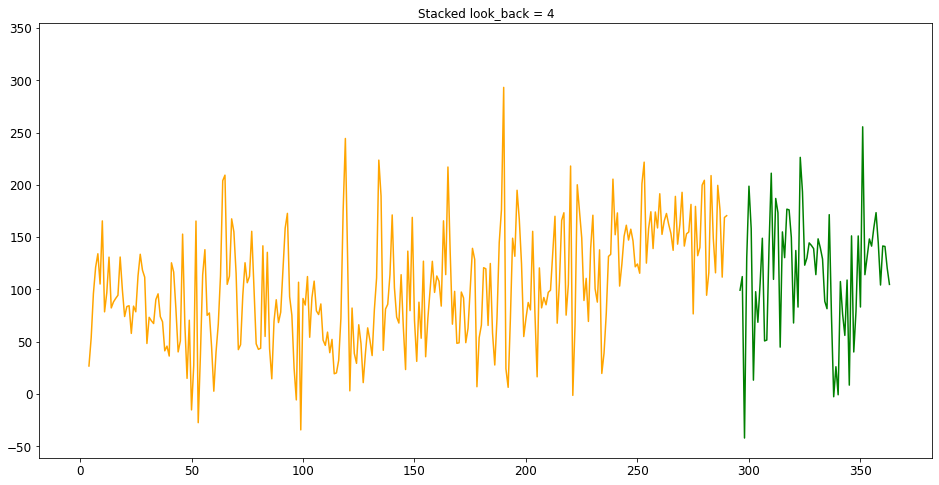

In [102]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 4')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [105]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 41.58 RMSE
Score em Teste: 82.01 RMSE


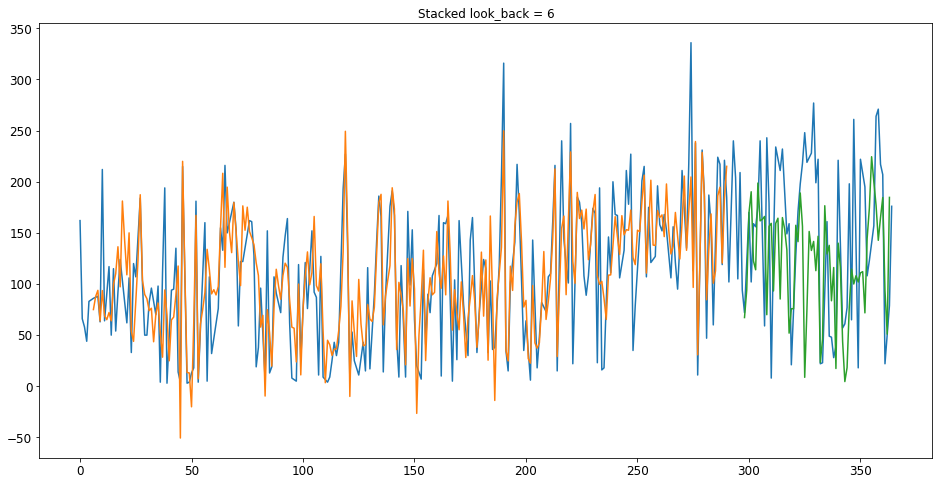

In [106]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 6')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

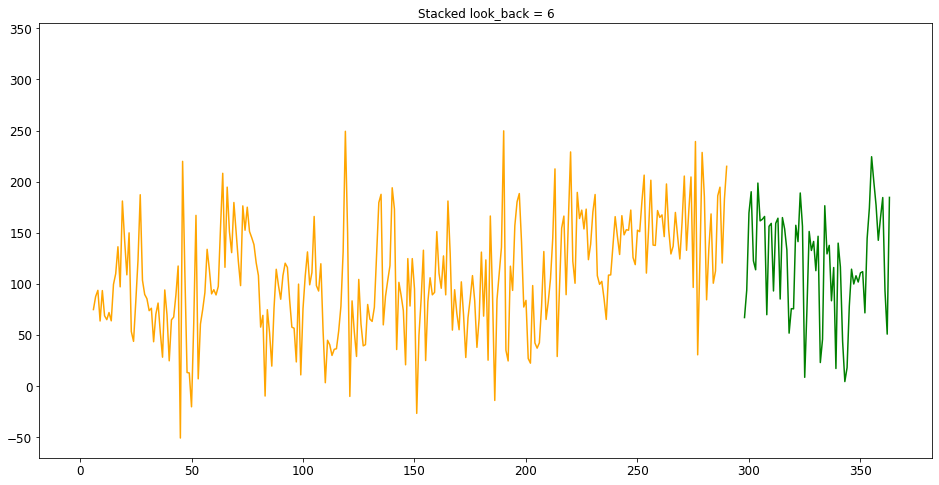

In [107]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 6')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [110]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 34.28 RMSE
Score em Teste: 88.37 RMSE


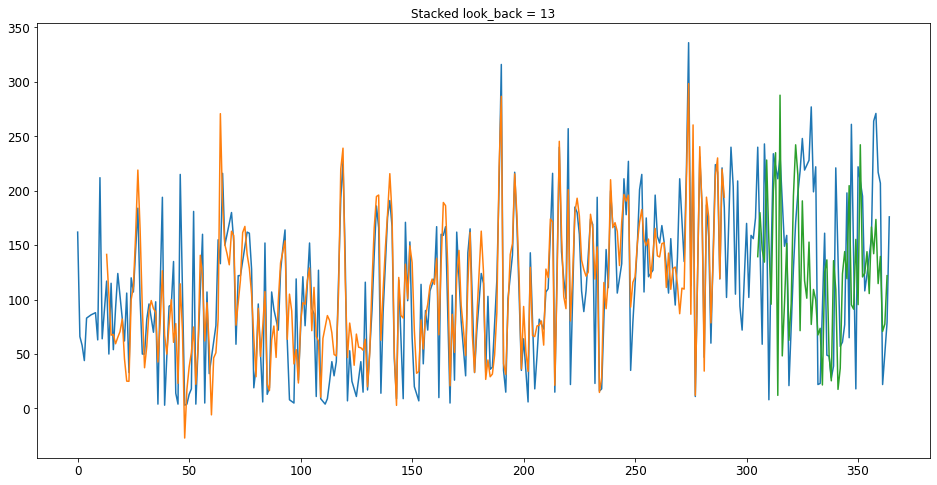

In [111]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 13')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

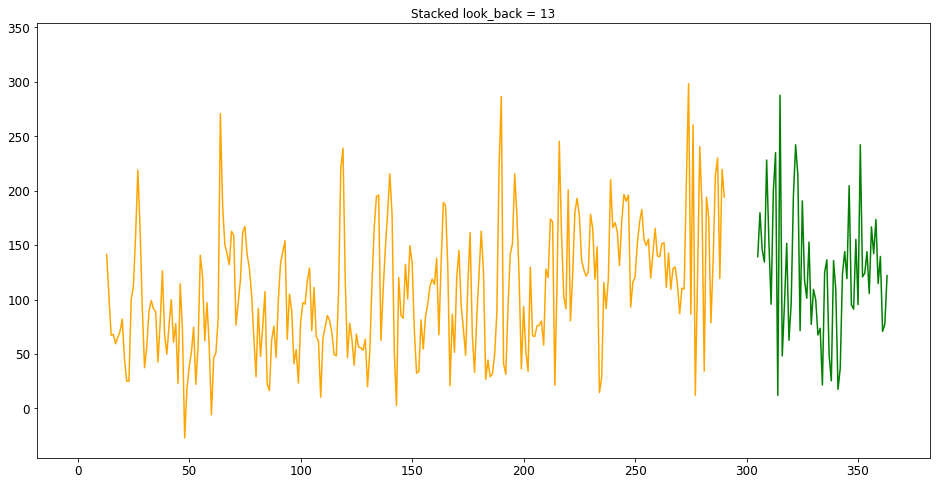

In [112]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 13')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [115]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 44.63 RMSE
Score em Teste: 113.76 RMSE


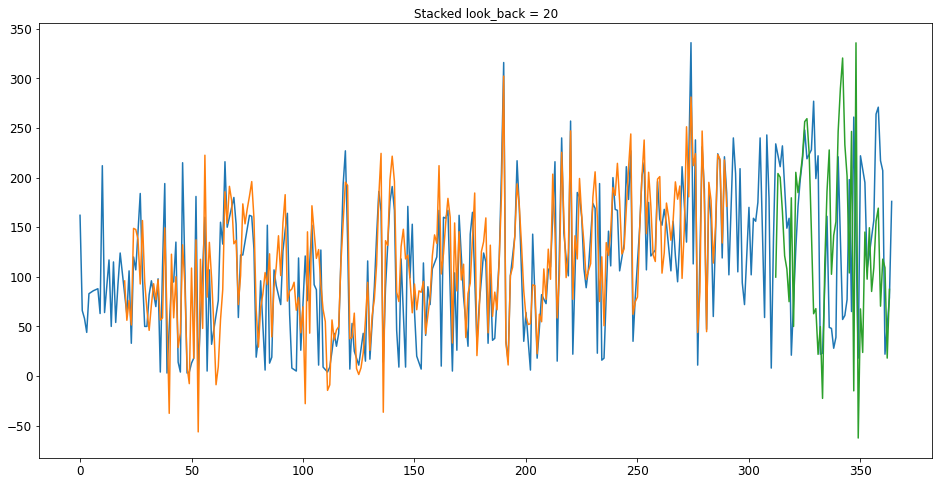

In [116]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 20')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

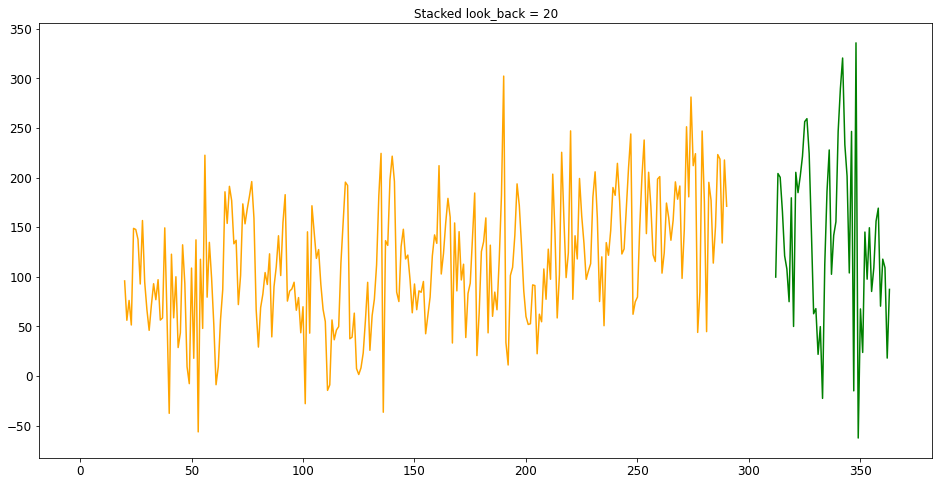

In [117]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 20')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

In [120]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

Score em Treino: 35.67 RMSE
Score em Teste: 114.12 RMSE


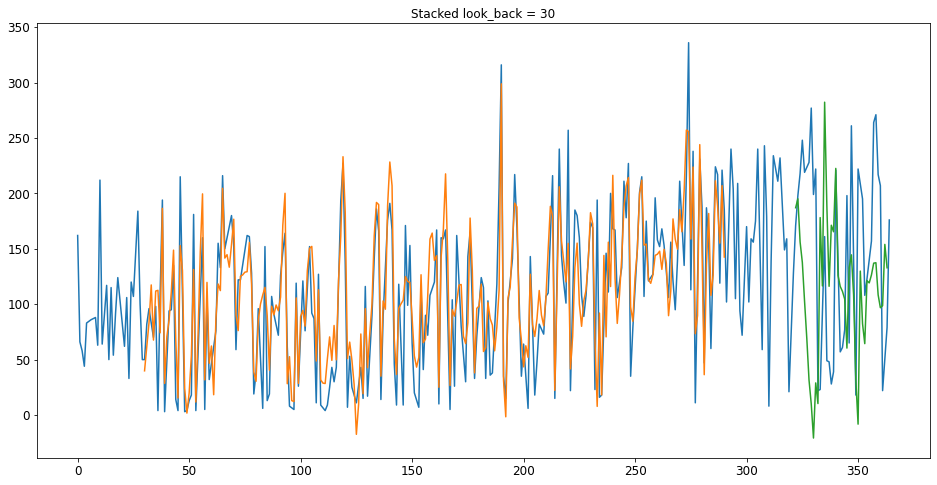

In [121]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 30')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

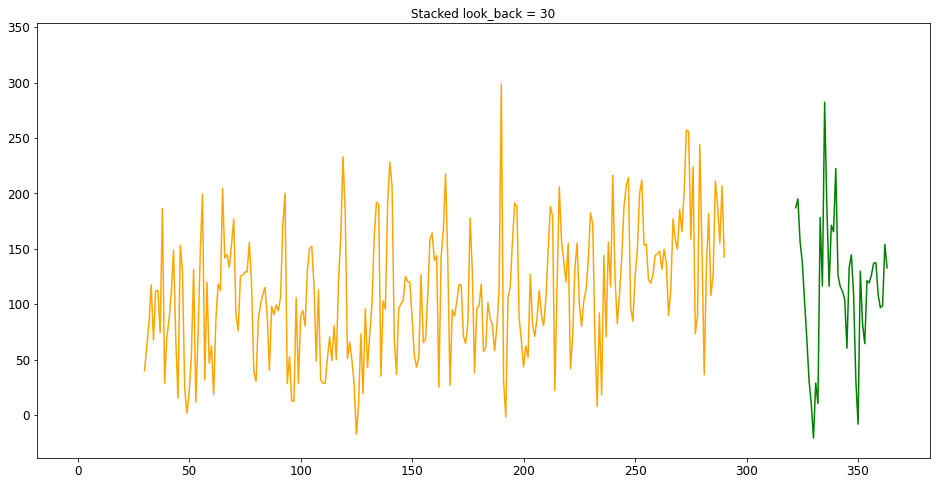

In [122]:
# Plot do baseline e previsões
plt.title('Stacked look_back = 30')
plt.plot(scaler.inverse_transform(dataset), color = 'white')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()

## ARIMA

In [32]:
import pandas as pd
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA
import math
from math import sqrt 
from pandas import concat

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para formatação dos gráficos
#plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [33]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

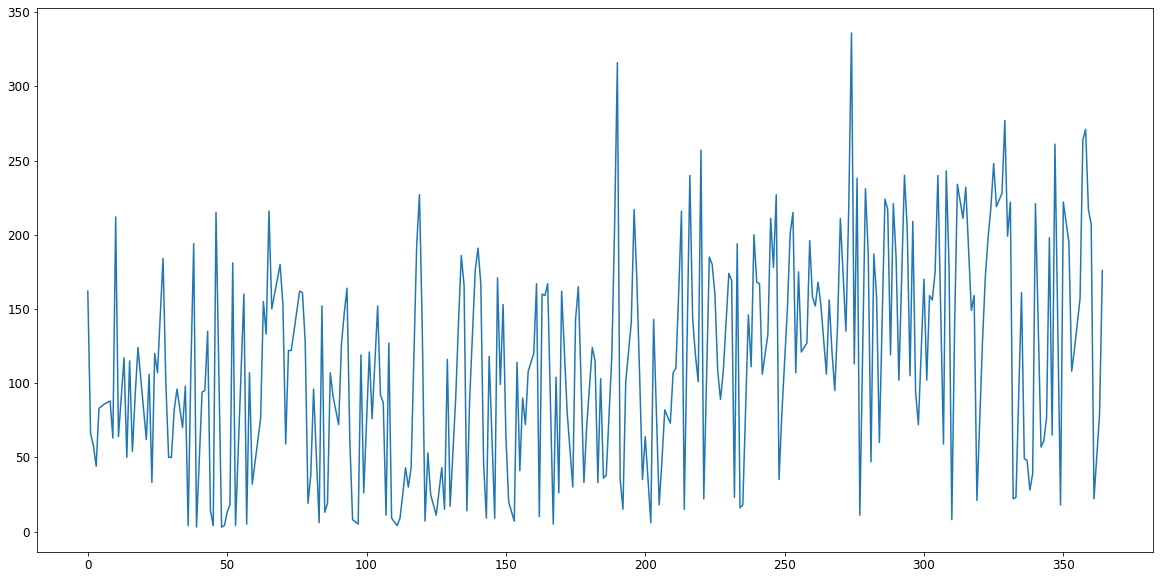

In [34]:
dataset = dataframe.copy()
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

In [35]:
# a variável X recebe os dados da série
X = dataframe.copy()
X = dataframe.values
X = dataset.astype('float32')

In [36]:
# Separa os dados com 75% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.75)

In [37]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [41]:
resultado = pd.DataFrame(test, columns=['dados_teste'])
resultado

dados_teste
0         217.0
1         336.0
2         113.0
3         238.0
4          11.0
..          ...
87        207.0
88         22.0
89         50.5
90         79.0
91        176.0

[92 rows x 1 columns]

In [54]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
    
    # difference data
    look_back = 30
    diff = difference(history, look_back)

    # cria um modelo ARIMA com os dados de history
    model = ARIMA(diff, order=(1,1,1))

    # treina o modelo ARIMA
    model_fit = model.fit(trend='nc', disp=0)

    # a variável valor_predito recebe o valor previsto pelo modelo
    valor_predito = model_fit.forecast()[0]

    # valor_predito recebe o valor revertido (escala original)
    valor_predito = inverse_difference(history, valor_predito, look_back)

    # adiciona o valor predito na lista de predicões
    predictions.append(valor_predito)

    # a variável valor_real recebe o valor real do teste
    valor_real = test[t]

    # adiciona o valor real a variável history
    history.append(valor_real)

    # imprime valor predito e valor real
    print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=136.189, Valor esperado=217
Valor predito=167.288, Valor esperado=336
Valor predito=274.903, Valor esperado=113
Valor predito=167.994, Valor esperado=238
Valor predito=253.652, Valor esperado= 11
Valor predito=-2.627, Valor esperado=121
Valor predito=107.161, Valor esperado=231
Valor predito=158.562, Valor esperado=188
Valor predito=179.099, Valor esperado= 47
Valor predito=192.015, Valor esperado=187
Valor predito=223.600, Valor esperado=158
Valor predito=105.652, Valor esperado= 60
Valor predito=174.700, Valor esperado=142
Valor predito=122.927, Valor esperado=224
Valor predito=155.145, Valor esperado=217
Valor predito=157.365, Valor esperado=119
Valor predito=205.085, Valor esperado=221
Valor predito=174.043, Valor esperado=185
Valor predito=168.626, Valor esperado=102
Valor predito=167.881, Valor esperado=171
Valor predito=163.664, Valor esperado=240
Valor predito=158.341, Valor esperado=204
Valor predito=133.168, Valor esperado=105
Valor predito=167.355, Valor espera

In [43]:
# Avaliando os resultados look_back = 2
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 106.363


In [44]:
resultado['previsao_2'] = pd.DataFrame((predictions), columns=['previsao_2'])
resultado

dados_teste  previsao_2
0         217.0  163.700060
1         336.0  140.729898
2         113.0  243.692938
3         238.0  324.937295
4          11.0  101.684415
..          ...         ...
87        207.0  267.009285
88         22.0  211.051267
89         50.5  186.602003
90         79.0    3.709108
91        176.0   56.426637

[92 rows x 2 columns]

In [46]:
# Avaliando os resultados look_back = 6
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 101.175


In [47]:
resultado['previsao_6'] = pd.DataFrame((predictions), columns=['previsao_6'])
resultado

dados_teste  previsao_2  previsao_6
0         217.0  163.700060  117.044533
1         336.0  140.729898  119.064134
2         113.0  243.692938  201.067200
3         238.0  324.937295  206.903188
4          11.0  101.684415  181.320038
..          ...         ...         ...
87        207.0  267.009285  151.606190
88         22.0  211.051267  162.744117
89         50.5  186.602003  129.172001
90         79.0    3.709108  238.277125
91        176.0   56.426637  224.041280

[92 rows x 3 columns]

In [49]:
# Avaliando os resultados look_back = 13
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 95.913


In [50]:
resultado['previsao_13'] = pd.DataFrame((predictions), columns=['previsao_13'])
resultado

dados_teste  previsao_2  previsao_6  previsao_13
0         217.0  163.700060  117.044533   146.624697
1         336.0  140.729898  119.064134   167.112951
2         113.0  243.692938  201.067200   212.013147
3         238.0  324.937295  206.903188   143.992525
4          11.0  101.684415  181.320038   150.326424
..          ...         ...         ...          ...
87        207.0  267.009285  151.606190   301.720115
88         22.0  211.051267  162.744117   128.600205
89         50.5  186.602003  129.172001    -9.227062
90         79.0    3.709108  238.277125   232.034801
91        176.0   56.426637  224.041280   175.353349

[92 rows x 4 columns]

In [52]:
# Avaliando os resultados look_back = 20
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 97.602


In [53]:
resultado['previsao_20'] = pd.DataFrame((predictions), columns=['previsao_2'])
resultado

dados_teste  previsao_2  previsao_6  previsao_13  previsao_20
0         217.0  163.700060  117.044533   146.624697   199.000340
1         336.0  140.729898  119.064134   167.112951   110.539597
2         113.0  243.692938  201.067200   212.013147   244.613330
3         238.0  324.937295  206.903188   143.992525   107.949781
4          11.0  101.684415  181.320038   150.326424   159.113648
..          ...         ...         ...          ...          ...
87        207.0  267.009285  151.606190   301.720115   277.101995
88         22.0  211.051267  162.744117   128.600205   137.603512
89         50.5  186.602003  129.172001    -9.227062    24.724483
90         79.0    3.709108  238.277125   232.034801    61.299669
91        176.0   56.426637  224.041280   175.353349    84.638783

[92 rows x 5 columns]

In [55]:
# Avaliando os resultados look_back = 30
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 99.545


In [56]:
resultado['previsao_30'] = pd.DataFrame((predictions), columns=['previsao_30'])
resultado

dados_teste  previsao_2  previsao_6  previsao_13  previsao_20  previsao_30
0         217.0  163.700060  117.044533   146.624697   199.000340   136.188946
1         336.0  140.729898  119.064134   167.112951   110.539597   167.288106
2         113.0  243.692938  201.067200   212.013147   244.613330   274.903308
3         238.0  324.937295  206.903188   143.992525   107.949781   167.993965
4          11.0  101.684415  181.320038   150.326424   159.113648   253.652306
..          ...         ...         ...          ...          ...          ...
87        207.0  267.009285  151.606190   301.720115   277.101995   188.371211
88         22.0  211.051267  162.744117   128.600205   137.603512   226.476077
89         50.5  186.602003  129.172001    -9.227062    24.724483   -20.184607
90         79.0    3.709108  238.277125   232.034801    61.299669    31.378752
91        176.0   56.426637  224.041280   175.353349    84.638783   106.628430

[92 rows x 6 columns]

In [66]:
resultado.to_csv('resultado.csv')

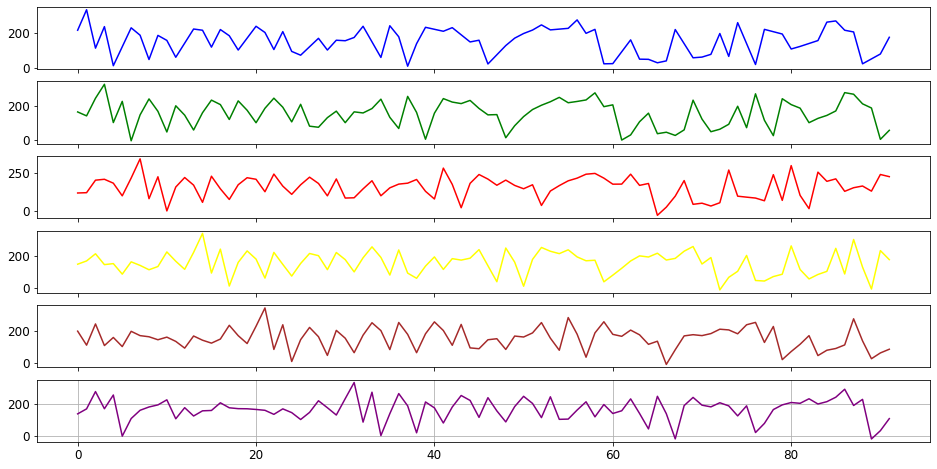

In [87]:
# Área de Plotagem
fig, axes = plt.subplots(6, sharex = True)
axes[0].plot(resultado['dados_teste'], color='blue');
axes[1].plot(resultado['previsao_2'], color='green');
axes[2].plot(resultado['previsao_6'], color='red');
axes[3].plot(resultado['previsao_13'], color='yellow');
axes[4].plot(resultado['previsao_20'], color='brown');
axes[5].plot(resultado['previsao_30'], color='purple');
#plt.grid()
plt.show();

In [61]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [63]:
# converte a lista em um dataframe
residuals = pandas.DataFrame(residuals)

In [64]:
# imprime as 5 primeiras linhas
residuals.head()

0
0   69.933568
1  147.648704
2  -91.021536
3  117.424907
4 -127.787696

In [65]:
# estatística descritiva
residuals.describe()

0
count   92.000000
mean    -1.265399
std     99.813694
min   -174.734302
25%    -85.153088
50%     -3.721423
75%     62.046457
max    239.470934

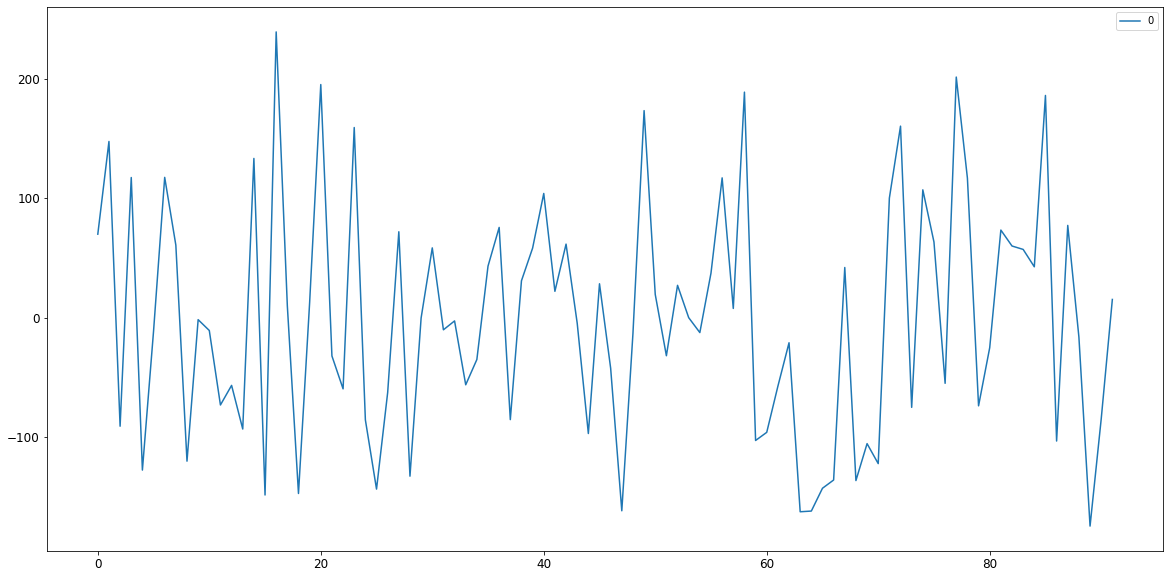

In [72]:
# plot residuals
residuals.plot()
plt.show()

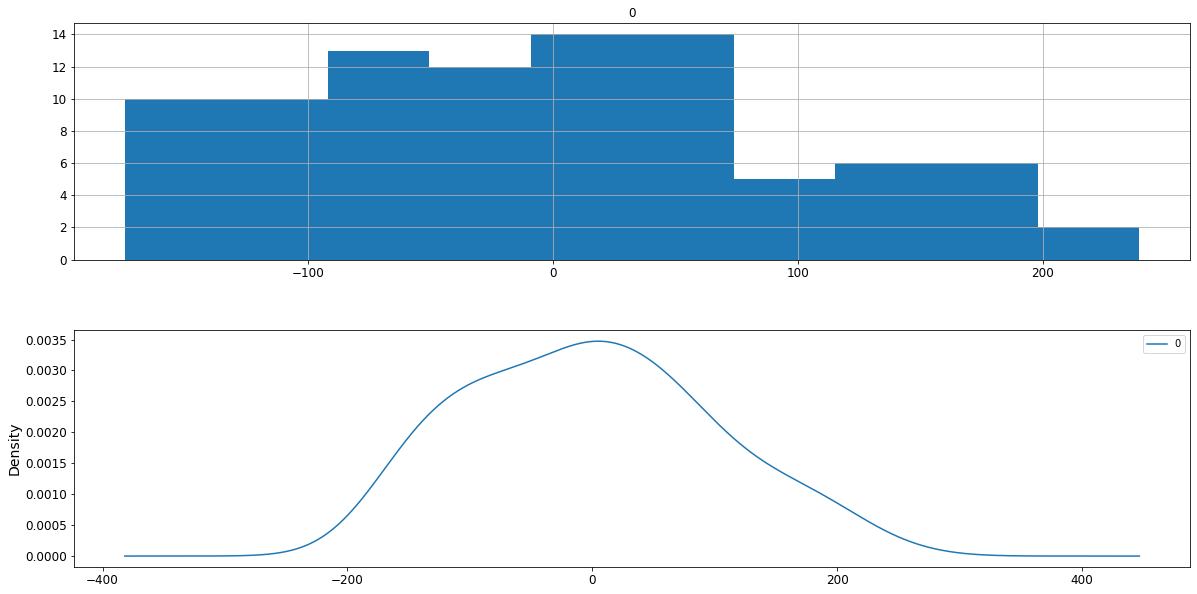

In [78]:
# plots histograma
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())

plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

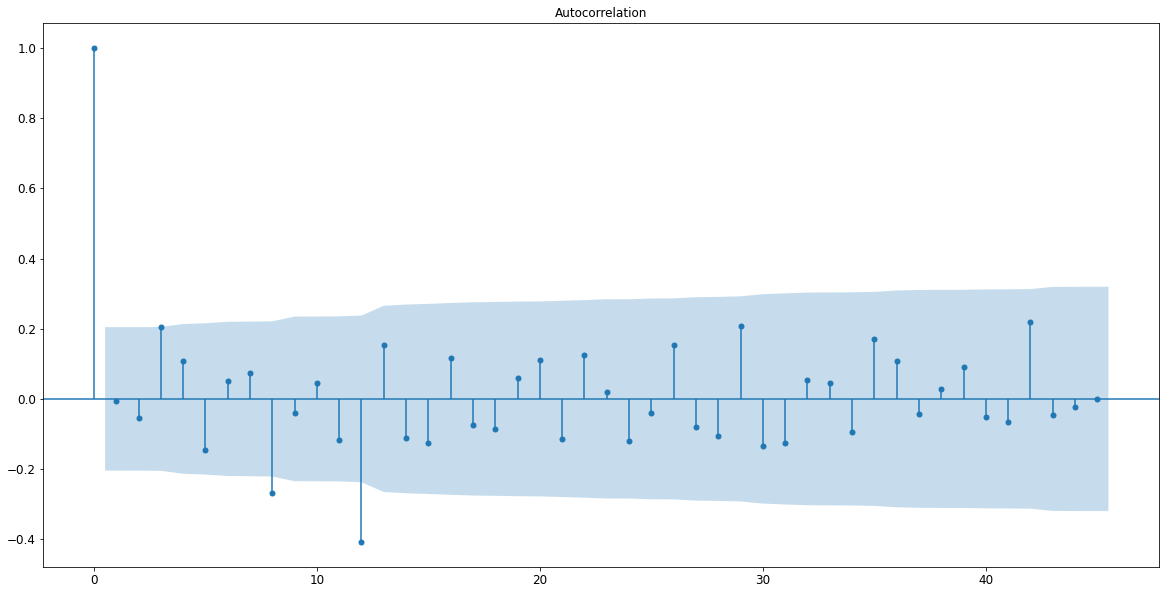

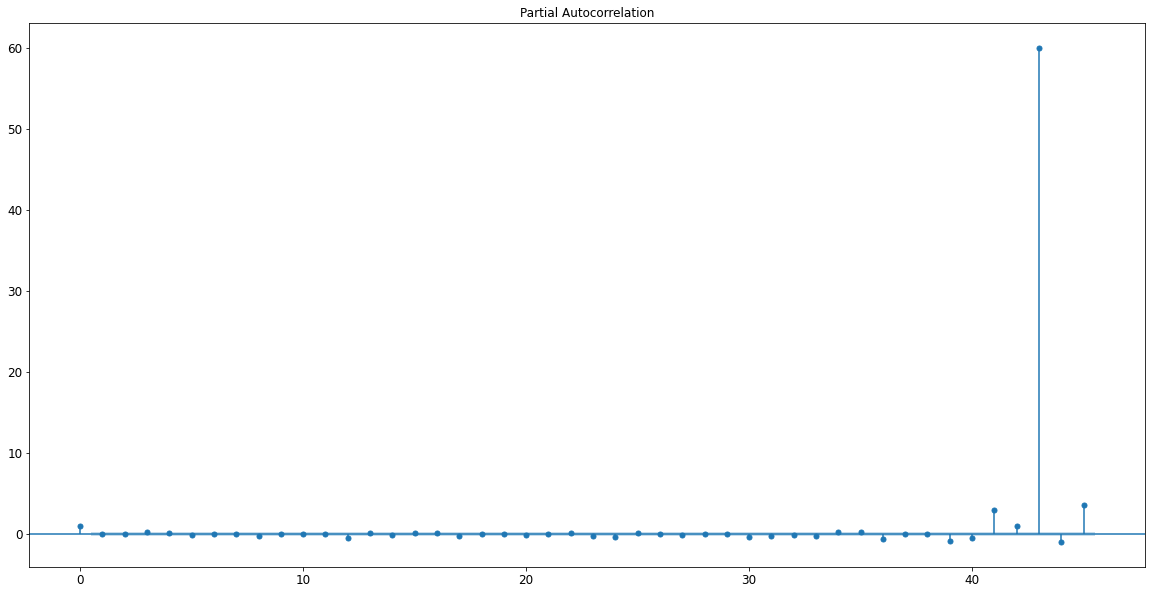

In [89]:
plot_acf(residuals, lags=45)
plot_pacf(residuals, lags=45)
plt.show()

## SARIMA

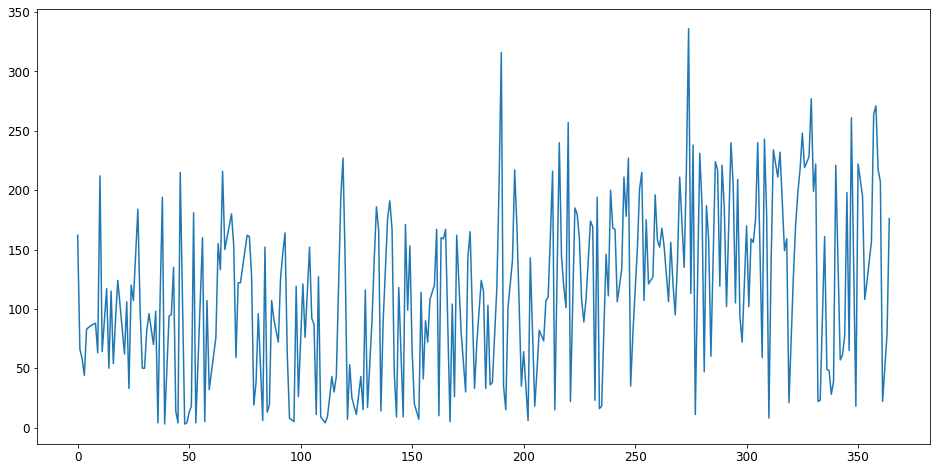

In [19]:
dataset=dataframe.copy()
dataset = dataset.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()

In [13]:
# a variável X recebe os dados da série
X = dataframe.copy()
X = dataframe.values
X = dataset.astype('float32')

In [14]:
# Separa os dados com 67% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.67)

In [15]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [16]:
resultado_s = pandas.DataFrame(test, columns=['dados_teste'])
resultado_s

dados_teste
0          133.0
1          211.0
2          178.0
3          227.0
4           35.0
..           ...
116        207.0
117         22.0
118         50.5
119         79.0
120        176.0

[121 rows x 1 columns]

In [17]:
import statsmodels.api as sm

In [19]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  look_back = 365.25

  # cria um modelo SARIMA com os dados de history
  # desliga a diferenciação do modelo ARIMA
  model = sm.tsa.statespace.SARIMAX(history, order=(0,0,0), seasonal_order=(0,1,0, look_back))
  
  # treina o modelo SARIMAX
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]
 
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=0.000, Valor esperado=133
Valor predito=0.000, Valor esperado=211
Valor predito=0.000, Valor esperado=178
Valor predito=0.000, Valor esperado=227
Valor predito=0.000, Valor esperado= 35
Valor predito=0.000, Valor esperado= 79
Valor predito=0.000, Valor esperado=114
Valor predito=0.000, Valor esperado=150
Valor predito=0.000, Valor esperado=201
Valor predito=0.000, Valor esperado=215
Valor predito=0.000, Valor esperado=107
Valor predito=0.000, Valor esperado=175
Valor predito=0.000, Valor esperado=121
Valor predito=0.000, Valor esperado=124
Valor predito=0.000, Valor esperado=127
Valor predito=0.000, Valor esperado=196
Valor predito=0.000, Valor esperado=158
Valor predito=0.000, Valor esperado=152
Valor predito=0.000, Valor esperado=168
Valor predito=0.000, Valor esperado=153
Valor predito=0.000, Valor esperado=130
Valor predito=0.000, Valor esperado=106
Valor predito=0.000, Valor esperado=156
Valor predito=0.000, Valor esperado=121
Valor predito=0.000, Valor esperado= 95


KeyboardInterrupt: 

In [ ]:
resultado_s['previsao'] = pd.DataFrame((predictions), columns=['previsao'])
resultado_s

In [ ]:
resultado_s.to_csv('resultado_s.csv')

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# Área de Plotagem
fig, axes = plt.subplots(2, sharex = True)
axes[0].plot(resultado_2['dados_teste'], color='blue');
axes[1].plot(resultado_2['previsao'], color='green');
#plt.grid()
plt.show();

In [ ]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
# converte a lista em um dataframe
residuals = pandas.DataFrame(residuals)

In [ ]:
# imprime as 5 primeiras linhas
residuals.head()

In [ ]:
# estatística descritiva
residuals.describe()

In [ ]:
# estatística descritiva
residuals.describe()

In [ ]:
# plots histograma
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())

plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [ ]:
plot_acf(residuals, lags=45)
plot_pacf(residuals, lags=45)
plt.show()

## Facebook Prophet

In [6]:
from prophet import Prophet

In [7]:
# Carrega os dataframe
dataframe = pandas.read_csv("./CSV/pipaColBrokerDia.csv")
dataframe['DATA'] = pandas.to_datetime(dataframe.DATA, format = '%Y-%m-%dT%H:%M:%S.%fZ')
dataframe.rename(columns={'DATA': 'Data'}, inplace=True)
dataframe = dataframe[['Data','BROKER','SERVICE_NAME','SERVICE_CLASS','PROGRAMA', 'QUANTIDADE']]
dataframe.rename(columns={'BROKER': 'Broker', 'SERVICE_NAME': 'Service_name', 'SERVICE_CLASS': 'Service_class',
                      'PROGRAMA': 'Programa', 'QUANTIDADE': 'Quantidade'}, inplace=True)

# Carregando os dados
# Podemos carregar este conjunto de dados facilmente usando a biblioteca Pandas. Não estamos interessados na data,
# pois que cada observação é separada pelo mesmo intervalo de um mês. Portanto, quando
# carregamos o conjunto de dados, podemos excluir a primeira coluna. O conjunto de dados baixado também tem rodapé
# com informações que podemos excluir com o argumento skipfooter para pandas.read_csv() 
# Uma vez carregado, podemos plotar facilmente todo o conjunto de dados. 

filtro1 = dataframe['Broker']=='ETB170'
filtro2 = dataframe['Service_name']=='PORTALDETRAN'
filtro3 = dataframe['Programa']=='NSDGX500'
dataframe = dataframe[filtro1 & filtro2 & filtro3]

dataframe = dataframe.rename_axis('index').reset_index()
dataframe.drop(columns=['index','Broker','Service_name','Service_class','Programa'], inplace=True)

# Remove as linhas com as datas duplicadas
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
# inclui dados missing com a interpolação 

dataframe.drop_duplicates(subset='Data', inplace=True)
dataframe = dataframe.set_index('Data')
dataframe = dataframe.resample('D').interpolate()
dataframe

Quantidade
Data                  
2021-10-26       162.0
2021-10-27        66.0
2021-10-28        58.0
2021-10-29        44.0
2021-10-30        83.0
...                ...
2022-10-21       207.0
2022-10-22        22.0
2022-10-23        50.5
2022-10-24        79.0
2022-10-25       176.0

[365 rows x 1 columns]

In [8]:
series = dataframe.copy()
series = series.squeeze()
series

Data
2021-10-26    162.0
2021-10-27     66.0
2021-10-28     58.0
2021-10-29     44.0
2021-10-30     83.0
              ...  
2022-10-21    207.0
2022-10-22     22.0
2022-10-23     50.5
2022-10-24     79.0
2022-10-25    176.0
Freq: D, Name: Quantidade, Length: 365, dtype: float64

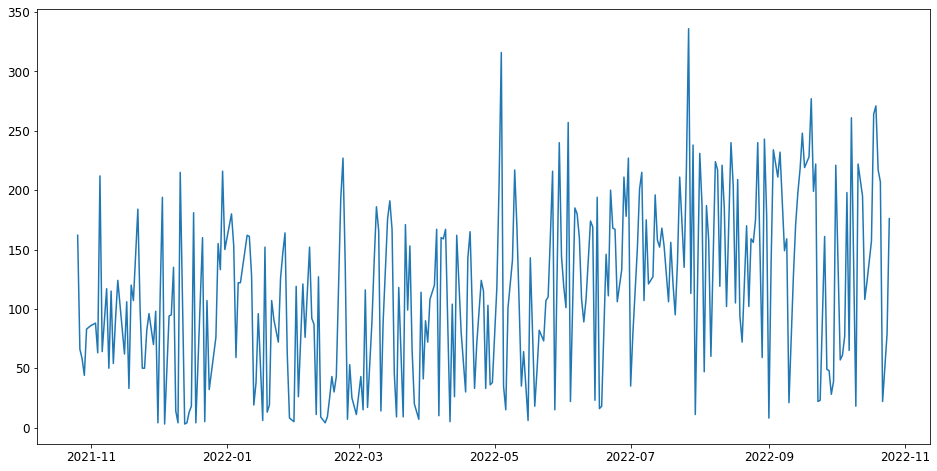

In [9]:
plt.plot(series)
plt.show()

In [10]:
# pega a quantidade de linhas e subtrai por 30
split_point = len(series) - 30

In [11]:
type(series)

pandas.core.series.Series

In [12]:
type(series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [14]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [15]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 335, Validation 30


In [16]:
# grava no disco
dataset.to_csv('dataset.csv')

In [17]:
# grava no disco
validation.to_csv('validation.csv')

In [18]:
# ds: features temporais
# y: valores a serem preditos

df = pandas.DataFrame({'ds': dataset.index, 'y': dataset.values})
df

ds      y
0   2021-10-26  162.0
1   2021-10-27   66.0
2   2021-10-28   58.0
3   2021-10-29   44.0
4   2021-10-30   83.0
..         ...    ...
330 2022-09-21  199.0
331 2022-09-22  222.0
332 2022-09-23   22.0
333 2022-09-24   23.0
334 2022-09-25   92.0

[335 rows x 2 columns]

In [19]:
# instancia o objeto prophet
model = Prophet()

In [20]:
# gerando o modelo
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 30, freq='D')

In [22]:
futuro

ds
0   2021-10-26
1   2021-10-27
2   2021-10-28
3   2021-10-29
4   2021-10-30
..         ...
360 2022-10-21
361 2022-10-22
362 2022-10-23
363 2022-10-24
364 2022-10-25

[365 rows x 1 columns]

In [23]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [24]:
# imprime saidas
saida.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-26  79.851239   44.649762  194.468087    79.851239    79.851239   
1 2021-10-27  79.923022    4.965035  157.017120    79.923022    79.923022   
2 2021-10-28  79.994805   -3.017872  150.633265    79.994805    79.994805   
3 2021-10-29  80.066588    1.177767  154.319931    80.066588    80.066588   
4 2021-10-30  80.138372  -18.319987  129.524538    80.138372    80.138372   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0       36.748040             36.748040             36.748040  36.748040   
1        3.449108              3.449108              3.449108   3.449108   
2       -4.292336             -4.292336             -4.292336  -4.292336   
3       -3.631432             -3.631432             -3.631432  -3.631432   
4      -25.092051            -25.092051            -25.092051 -25.092051   

   weekly_lower  weekly_upper  multiplicative_terms  \
0     36.748040     36.748040                   0.0   
1      3.449108      3.449108                   0.0   
2     -4.292336     -4.292336                   0.0   
3     -3.631432     -3.631432                   0.0   
4    -25.092051    -25.092051                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  116.599279  
1                         0.0                         0.0   83.372130  
2                         0.0                         0.0   75.702470  
3                         0.0                         0.0   76.435157  
4                         0.0                         0.0   55.046321

In [25]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds        yhat  yhat_lower  yhat_upper
358 2022-10-19  177.943794  100.800522  248.441819
359 2022-10-20  170.571613   93.664563  247.903676
360 2022-10-21  171.601779   95.888451  245.356574
361 2022-10-22  150.510422   72.606902  223.274015
362 2022-10-23  165.158752   92.947735  242.804218
363 2022-10-24  179.972650  103.127518  257.610499
364 2022-10-25  213.458298  138.213955  287.866517

In [26]:
# dataset de validação
validation_df = pandas.DataFrame({'ds': validation.index})

In [27]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [28]:
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0  2022-09-26  169.633313   93.630088  247.387799
1  2022-09-27  203.118961  127.360817  276.722749
2  2022-09-28  170.189292   92.910142  244.957822
3  2022-09-29  162.817110   86.823151  235.065811
4  2022-09-30  163.847276   87.316728  238.742262
5  2022-10-01  142.755919   68.112067  220.264098
6  2022-10-02  157.404249   78.300593  228.792555
7  2022-10-03  172.218148   92.987631  246.650664
8  2022-10-04  205.703796  125.148877  283.623884
9  2022-10-05  172.774126   95.555845  248.121993
10 2022-10-06  165.401944   82.021821  244.481278
11 2022-10-07  166.432110   89.006834  252.003130
12 2022-10-08  145.340753   70.117377  220.718738
13 2022-10-09  159.989083   81.495207  234.890934
14 2022-10-10  174.802982   99.162693  252.165394
15 2022-10-11  208.288630  135.045342  289.106828
16 2022-10-12  175.358960  100.680744  249.372775
17 2022-10-13  167.986779   91.598225  245.430678
18 2022-10-14  169.016944   86.010531  247.466279
19 2022-10-15  147.925588   76.598396  225.740565
20 2022-10-16  162.573917   87.677449  242.071520
21 2022-10-17  177.387816  101.799050  251.231405
22 2022-10-18  210.873464  138.421747  283.921494
23 2022-10-19  177.943794  104.373962  248.553288
24 2022-10-20  170.571613   93.444250  246.456211
25 2022-10-21  171.601779   97.522502  244.521158
26 2022-10-22  150.510422   71.983810  227.856116
27 2022-10-23  165.158752   86.647591  237.771003
28 2022-10-24  179.972650  101.104737  249.951003
29 2022-10-25  213.458298  134.273046  285.055259

In [29]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 88.608


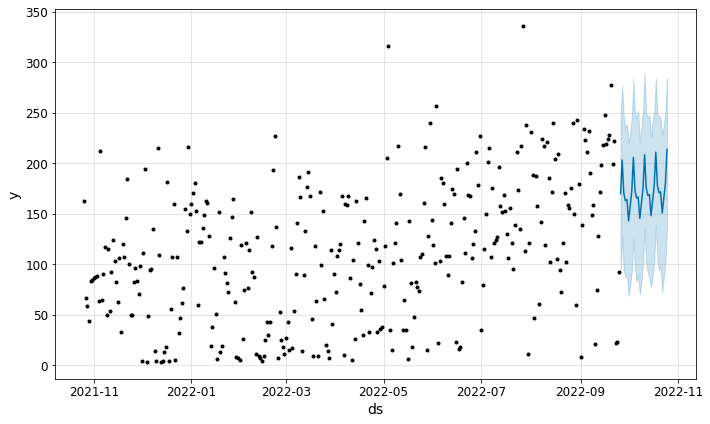

In [30]:
# Python
figura = model.plot(saida)

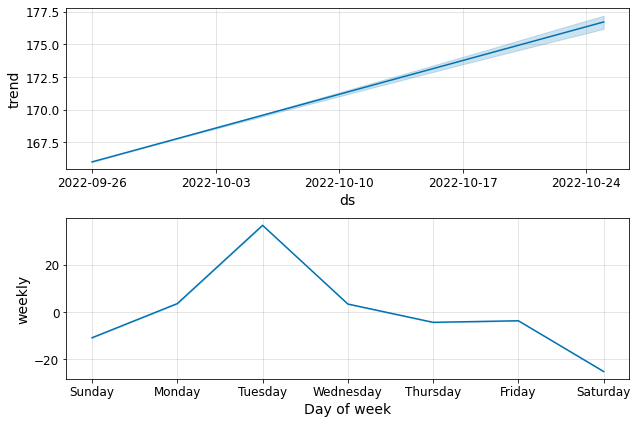

In [31]:
model.plot_components(saida);

In [34]:
#model = Prophet(seasonality_mode='multiplicative')
model = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True, daily_seasonality=True)

In [35]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [36]:
validation_df = pandas.DataFrame({'ds': validation.index})

In [37]:
saida = model.predict(validation_df)

In [38]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 91.695


In [39]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, )

In [40]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [41]:
# imprime a sazonalidade habilitada
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'multiplicative',
               'condition_name': None})])

In [42]:
# cria o dataframe de validação
validation_df = pandas.DataFrame({'ds': validation.index})

In [43]:
# prevendo dados
saida = model.predict(validation_df)

In [44]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 91.344


# Fim